<a href="https://colab.research.google.com/github/AshikaAnand12/House-Listing-Price-Prediction/blob/main/CMPE_257_%7C_Midterm_%7C_Ashika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### **ASHIKA ANAND BABU**

---
**SJSU ID: 015966678**

**MAIL ID: ashika.anandbabu@sjsu.edu**

*Team: Conquerors*

Setup Steps:
1. Navigate to [ML-Spring-2022](https://drive.google.com/drive/folders/1CVe7u-1UZ-HqzNeoVWEI6rHzcmHcrHOb?usp=sharing)
2. Navigate to folder [Conquerors](https://drive.google.com/drive/folders/1ZF7p5MQ-S4QgMrggHcEqfNCtixpcefOE?usp=sharing) within ML-Spring-2022
3. Right click on the folder Conquerors
4. Select "Add Shortcut to Drive"

# MIDTERM

### Drive Connection

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### IMPORTS

In [ ]:
!pip install pgeocode

In [ ]:
!pip install explainerdashboard

In [ ]:
!pip install sweetviz

In [ ]:
# Imports
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pgeocode
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn import tree
import plotly.express as px

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import jaccard_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from explainerdashboard import InlineExplainer
from explainerdashboard.custom import *
from explainerdashboard import ClassifierExplainer, ExplainerDashboard, RegressionExplainer

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import svm
from sklearn.linear_model import RANSACRegressor

import time

import sweetviz as sv
import IPython

In [ ]:
# merging the files
joined_files = os.path.join("gdrive/My Drive/Conquerors/Midterm/Data/", "d*.csv")

# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [ ]:
df.to_csv('gdrive/My Drive/Conquerors/Midterm/Data/output.csv')

## DATA COLLECTION

### REDFIN DATA

In [ ]:
redfin = pd.read_csv('gdrive/My Drive/Conquerors/Midterm/Data/finalDataset/redfin.csv',encoding='utf-8',index_col=0)
redfin.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,walk_score,bike_score,transit_score
0,MLS Listing,NaN,Single Family Residential,5520 SE Mitchell St,Portland,OR,97206,455000,3.0,1.0,...,https://www.redfin.com/OR/Portland/5520-SE-Mit...,RMLS,22053411,N,Y,45.485231,-122.606101,66,99.0,45.0
1,MLS Listing,NaN,Single Family Residential,8830 NE Sacramento St,Portland,OR,97220,499000,8.0,3.5,...,https://www.redfin.com/OR/Portland/8830-NE-Sac...,RMLS,22157987,N,Y,45.539083,-122.571741,45,86.0,62.0
2,MLS Listing,NaN,Townhouse,5002 SW Taylors Ferry Rd,Portland,OR,97219,524900,3.0,2.5,...,https://www.redfin.com/OR/Portland/5002-SW-Tay...,RMLS,22456568,N,Y,45.454313,-122.728361,59,60.0,41.0
3,MLS Listing,NaN,Single Family Residential,3708 N Michigan Ave,Portland,OR,97227,575000,3.0,1.5,...,https://www.redfin.com/OR/Portland/3708-N-Mich...,RMLS,22071710,N,Y,45.549749,-122.676364,92,95.0,53.0
4,MLS Listing,NaN,Single Family Residential,11226 NE San Rafael St,Portland,OR,97220,359900,3.0,1.0,...,https://www.redfin.com/OR/Portland/11226-NE-Sa...,RMLS,22238437,N,Y,45.536998,-122.547130,79,88.0,44.0


In [ ]:
redfin.drop(columns={"URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)",
                           "SOURCE","MLS#","FAVORITE","INTERESTED","NEXT OPEN HOUSE START TIME","NEXT OPEN HOUSE END TIME","LATITUDE",
                           "LONGITUDE","HOA/MONTH","STATUS","YEAR BUILT","LOCATION","$/SQUARE FEET","SALE TYPE"},inplace=True)
redfin.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,DAYS ON MARKET,walk_score,bike_score,transit_score
0,NaN,Single Family Residential,5520 SE Mitchell St,Portland,OR,97206,455000,3.0,1.0,1008.0,6098.0,1.0,66,99.0,45.0
1,NaN,Single Family Residential,8830 NE Sacramento St,Portland,OR,97220,499000,8.0,3.5,2610.0,7405.0,1.0,45,86.0,62.0
2,NaN,Townhouse,5002 SW Taylors Ferry Rd,Portland,OR,97219,524900,3.0,2.5,1704.0,6969.0,2.0,59,60.0,41.0
3,NaN,Single Family Residential,3708 N Michigan Ave,Portland,OR,97227,575000,3.0,1.5,1344.0,NaN,2.0,92,95.0,53.0
4,NaN,Single Family Residential,11226 NE San Rafael St,Portland,OR,97220,359900,3.0,1.0,890.0,4791.0,2.0,79,88.0,44.0


### ZILLOW DATA

In [ ]:
zillow = pd.read_csv('gdrive/My Drive/Conquerors/Midterm/Data/finalDataset/zillowFinal.csv',encoding='utf-8',index_col=0)
zillow.head()

,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,...,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url,walk_score,bike_score,transit_score
rank,,,,,,,,,,,,,,,,,,,,,
205,70983496,"109 Sunrise Fls, Cibolo, TX 78108",29.599431,-98.254866,296000.0,USD,3.0,3.0,2294.0 sqft,NaN,...,False,https://photos.zillowstatic.com/fp/41ca4905859...,House for sale,Opendoor Brokerage LLC,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/109-Sunrise...,https://www.zillow.com/homes/TX_rb/6_p/,32.0,36.0,NaN
711,30429260,"299 Mount Whitney Way, Lake Placid, NY 12946",44.306944,-73.950285,1995000.0,USD,5.0,4.0,3000.0 sqft,NaN,...,False,https://photos.zillowstatic.com/fp/3071787e4e5...,House for sale,"Listing by: Merrill L. Thomas, Inc.",https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/299-Mount-W...,https://www.zillow.com/homes/NY_rb/18_p/,0.0,NaN,NaN
66,97629907,"2910 Persimmon Grv, Richmond, TX 77469",29.557442,-95.751786,425000.0,USD,3.0,2.0,2575.0 sqft,NaN,...,False,https://photos.zillowstatic.com/fp/f4716b346d1...,House for sale,CENTURY 21 Western Realty,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/2910-Persim...,https://www.zillow.com/homes/TX_rb/2_p/,11.0,34.0,NaN
222,240296342,"19251 E State Route 106, Belfair, WA 98528",47.427678,-122.855113,895000.0,USD,2.0,2.0,1248.0 sqft,NaN,...,False,https://photos.zillowstatic.com/fp/690e2ee9c08...,Active,NaN,https://www.zillow.com/homes/WA_rb/,https://www.zillow.com/homedetails/19251-E-Sta...,https://www.zillow.com/homes/WA_rb/6_p/,1.0,NaN,NaN
444,2076995275,"Clover Plan, The Alpine Collection at Altaira ...",39.813670,-104.765885,391500.0,USD,3.0,4.0,1752.0 sqft,NaN,...,False,https://photos.zillowstatic.com/fp/9b2ae0d3768...,New construction,NaN,"https://www.zillow.com/homes/denver,-co_rb/",https://www.zillow.com/community/alpine-collec...,"https://www.zillow.com/homes/denver,-co_rb/12_p/",14.0,29.0,15.0


In [ ]:
zillow.drop(columns={"property_id","currency","rent_zestimate","image","is_zillow_owned",'broker_name',
                     'input','property_url','listing_url',
                     'latitude','longitude'},inplace=True)
zillow.head()

,address,price,bathrooms,bedrooms,area,land_area,zestimate,days_on_zillow,sold_date,listing_type,walk_score,bike_score,transit_score
rank,,,,,,,,,,,,,
205,"109 Sunrise Fls, Cibolo, TX 78108",296000.0,3.0,3.0,2294.0 sqft,NaN,270100.0,0.0,NaN,House for sale,32.0,36.0,NaN
711,"299 Mount Whitney Way, Lake Placid, NY 12946",1995000.0,5.0,4.0,3000.0 sqft,NaN,NaN,0.0,NaN,House for sale,0.0,NaN,NaN
66,"2910 Persimmon Grv, Richmond, TX 77469",425000.0,3.0,2.0,2575.0 sqft,NaN,436000.0,0.0,NaN,House for sale,11.0,34.0,NaN
222,"19251 E State Route 106, Belfair, WA 98528",895000.0,2.0,2.0,1248.0 sqft,NaN,NaN,0.0,NaN,Active,1.0,NaN,NaN
444,"Clover Plan, The Alpine Collection at Altaira ...",391500.0,3.0,4.0,1752.0 sqft,NaN,NaN,9.0,NaN,New construction,14.0,29.0,15.0


### REALTOR DATA

In [ ]:
realtor = pd.read_csv('gdrive/My Drive/Conquerors/Midterm/Data/finalDataset/realtorfinal.csv',encoding='utf-8',index_col=0)
realtor.head()

,address,price,bathrooms,bedrooms,area,listing_type,SOURCE,zip,CITY,STATE,SQFT,LOT,latitude,longitude,walk_score,bike_score,transit_score
property_id,,,,,,,,,,,,,,,,,
8.469112e+09,"1516 Persimmon Ave, Metairie, LA 70001","$399,000",2,3.0,"1,723 sqft | 6,000 sqft lot",House,REALTOR,70001,Metairie,LA,"1,723","6,000",29.988589,-90.181900,65,48.0,NaN
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206","$460,000",1.5,2.0,"1,396 sqft | 9,583 sqft lot",House,REALTOR,97206,Portland,OR,"1,396","9,583",45.469699,-122.583215,77,86.0,47.0
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103","$4,495,000",4,5.0,"4,208 sqft | 13,939 sqft lot",House,REALTOR,92103,"San,Diego",CA,"4,208","13,939",32.756324,-117.188080,44,41.0,56.0
9.867537e+09,"279 Novel, Irvine, CA 92618","$1,300,975",3.5,4.0,"2,395 sqft | 1,000 sqft lot",Townhome,REALTOR,92618,Irvine,CA,"2,395","1,000",33.691607,-117.737579,9,57.0,0.0
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126","$699,950",2,2.0,"1,325 sqft | 43,560 sqft lot",House,REALTOR,98126,Seattle,WA,"1,325","43,560",47.546658,-122.375239,67,65.0,50.0


In [ ]:
realtor.drop(columns={"SQFT","LOT","zip"},inplace=True)

## DATA PREPROCESSING

In [ ]:
zillow = zillow[zillow.address != 'Clover Plan, The Alpine Collection at Altaira at High Point']

In [ ]:
print("REDFIN Columns: ",redfin.columns)
print("ZILLOW Columns",zillow.columns)
print("REALTOR Columns",realtor.columns)

REDFIN Columns:  Index(['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET',
       'LOT SIZE', 'DAYS ON MARKET', 'walk_score', 'bike_score',
       'transit_score'],
      dtype='object')
ZILLOW Columns Index(['address', 'price', 'bathrooms', 'bedrooms', 'area', 'land_area',
       'zestimate', 'days_on_zillow', 'sold_date', 'listing_type',
       'walk_score', 'bike_score', 'transit_score'],
      dtype='object')
REALTOR Columns Index(['address', 'price', 'bathrooms', 'bedrooms', 'area', 'listing_type',
       'SOURCE', 'CITY', 'STATE', 'latitude', 'longitude', 'walk_score',
       'bike_score', 'transit_score'],
      dtype='object')


### Rename Columns

In [ ]:
redfin = redfin.rename(columns={'STATE OR PROVINCE': 'STATE', 'ZIP OR POSTAL CODE': 'ZIP',
                                'SQUARE FEET': 'SQFT', 'LOT SIZE': 'LOT','DAYS ON MARKET':'DAYS',
                                'PROPERTY TYPE':'TYPE','walk_score': 'WALK SCORE', 'bike_score': 'BIKE SCORE', 'transit_score': 'TRANSIT SCORE'})
redfin['SOURCE'] = 'REDFIN'
redfin.head()

,SOLD DATE,TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE
0,NaN,Single Family Residential,5520 SE Mitchell St,Portland,OR,97206,455000,3.0,1.0,1008.0,6098.0,1.0,66,99.0,45.0,REDFIN
1,NaN,Single Family Residential,8830 NE Sacramento St,Portland,OR,97220,499000,8.0,3.5,2610.0,7405.0,1.0,45,86.0,62.0,REDFIN
2,NaN,Townhouse,5002 SW Taylors Ferry Rd,Portland,OR,97219,524900,3.0,2.5,1704.0,6969.0,2.0,59,60.0,41.0,REDFIN
3,NaN,Single Family Residential,3708 N Michigan Ave,Portland,OR,97227,575000,3.0,1.5,1344.0,NaN,2.0,92,95.0,53.0,REDFIN
4,NaN,Single Family Residential,11226 NE San Rafael St,Portland,OR,97220,359900,3.0,1.0,890.0,4791.0,2.0,79,88.0,44.0,REDFIN


In [ ]:
zillow = zillow.rename(columns={'address': 'ADDRESS', 'price': 'PRICE','bathrooms': 'BATHS', 'bedrooms': 'BEDS','area': 'SQFT', 'land_area': 'LOT',
                                'days_on_zillow': 'DAYS', 'sold_date': 'SOLD DATE','listing_type':'TYPE',
                                'walk_score': 'WALK SCORE', 'bike_score': 'BIKE SCORE', 'transit_score': 'TRANSIT SCORE'})
zillow['SOURCE'] = 'ZILLOW'
zillow.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,LOT,zestimate,DAYS,SOLD DATE,TYPE,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE
rank,,,,,,,,,,,,,,
205,"109 Sunrise Fls, Cibolo, TX 78108",296000.0,3.0,3.0,2294.0 sqft,NaN,270100.0,0.0,NaN,House for sale,32.0,36.0,NaN,ZILLOW
711,"299 Mount Whitney Way, Lake Placid, NY 12946",1995000.0,5.0,4.0,3000.0 sqft,NaN,NaN,0.0,NaN,House for sale,0.0,NaN,NaN,ZILLOW
66,"2910 Persimmon Grv, Richmond, TX 77469",425000.0,3.0,2.0,2575.0 sqft,NaN,436000.0,0.0,NaN,House for sale,11.0,34.0,NaN,ZILLOW
222,"19251 E State Route 106, Belfair, WA 98528",895000.0,2.0,2.0,1248.0 sqft,NaN,NaN,0.0,NaN,Active,1.0,NaN,NaN,ZILLOW
209,"332 C St SW, Ephrata, WA 98823",225000.0,1.0,3.0,2053.0 sqft,NaN,231400.0,0.0,NaN,Active,67.0,53.0,NaN,ZILLOW


In [ ]:
realtor = realtor.rename(columns={'address': 'ADDRESS', 'price': 'PRICE','bathrooms': 'BATHS', 
                                  'bedrooms': 'BEDS','area': 'SQFT','listing_type':'TYPE',
                                  'walk_score': 'WALK SCORE', 'bike_score': 'BIKE SCORE', 'transit_score': 'TRANSIT SCORE'})
realtor['SOURCE'] = 'REALTOR'
realtor.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE
property_id,,,,,,,,,,,,,,
8.469112e+09,"1516 Persimmon Ave, Metairie, LA 70001","$399,000",2,3.0,"1,723 sqft | 6,000 sqft lot",House,REALTOR,Metairie,LA,29.988589,-90.181900,65,48.0,NaN
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206","$460,000",1.5,2.0,"1,396 sqft | 9,583 sqft lot",House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103","$4,495,000",4,5.0,"4,208 sqft | 13,939 sqft lot",House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0
9.867537e+09,"279 Novel, Irvine, CA 92618","$1,300,975",3.5,4.0,"2,395 sqft | 1,000 sqft lot",Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126","$699,950",2,2.0,"1,325 sqft | 43,560 sqft lot",House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0


### Zillow Data processing

In [ ]:
zillow['SQFT'] = zillow['SQFT'].astype('string')
zillow['SQFT'] = zillow['SQFT'].str.split(' ').str[0]
zillow.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,LOT,zestimate,DAYS,SOLD DATE,TYPE,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE
rank,,,,,,,,,,,,,,
205,"109 Sunrise Fls, Cibolo, TX 78108",296000.0,3.0,3.0,2294.0,NaN,270100.0,0.0,NaN,House for sale,32.0,36.0,NaN,ZILLOW
711,"299 Mount Whitney Way, Lake Placid, NY 12946",1995000.0,5.0,4.0,3000.0,NaN,NaN,0.0,NaN,House for sale,0.0,NaN,NaN,ZILLOW
66,"2910 Persimmon Grv, Richmond, TX 77469",425000.0,3.0,2.0,2575.0,NaN,436000.0,0.0,NaN,House for sale,11.0,34.0,NaN,ZILLOW
222,"19251 E State Route 106, Belfair, WA 98528",895000.0,2.0,2.0,1248.0,NaN,NaN,0.0,NaN,Active,1.0,NaN,NaN,ZILLOW
209,"332 C St SW, Ephrata, WA 98823",225000.0,1.0,3.0,2053.0,NaN,231400.0,0.0,NaN,Active,67.0,53.0,NaN,ZILLOW


In [ ]:
zillow.index.duplicated()
zillow = zillow.loc[~zillow.index.duplicated(), :]

In [ ]:
zillow.loc[zillow['LOT'].isnull(),'LOT'] = zillow['SQFT']
zillow.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ADDRESS,PRICE,BATHS,BEDS,SQFT,LOT,zestimate,DAYS,SOLD DATE,TYPE,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE
rank,,,,,,,,,,,,,,
205,"109 Sunrise Fls, Cibolo, TX 78108",296000.0,3.0,3.0,2294.0,2294.0,270100.0,0.0,NaN,House for sale,32.0,36.0,NaN,ZILLOW
711,"299 Mount Whitney Way, Lake Placid, NY 12946",1995000.0,5.0,4.0,3000.0,3000.0,NaN,0.0,NaN,House for sale,0.0,NaN,NaN,ZILLOW
66,"2910 Persimmon Grv, Richmond, TX 77469",425000.0,3.0,2.0,2575.0,2575.0,436000.0,0.0,NaN,House for sale,11.0,34.0,NaN,ZILLOW
222,"19251 E State Route 106, Belfair, WA 98528",895000.0,2.0,2.0,1248.0,1248.0,NaN,0.0,NaN,Active,1.0,NaN,NaN,ZILLOW
209,"332 C St SW, Ephrata, WA 98823",225000.0,1.0,3.0,2053.0,2053.0,231400.0,0.0,NaN,Active,67.0,53.0,NaN,ZILLOW


In [ ]:
zillow['TYPE'] = zillow['TYPE'].str.split(' ').str[0]
# zillow.head()
zillow1 = zillow

In [ ]:
zillow = zillow1.drop(['SOLD DATE','zestimate'], axis=1)
zillow.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,LOT,DAYS,TYPE,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE
rank,,,,,,,,,,,,
205,"109 Sunrise Fls, Cibolo, TX 78108",296000.0,3.0,3.0,2294.0,2294.0,0.0,House,32.0,36.0,NaN,ZILLOW
711,"299 Mount Whitney Way, Lake Placid, NY 12946",1995000.0,5.0,4.0,3000.0,3000.0,0.0,House,0.0,NaN,NaN,ZILLOW
66,"2910 Persimmon Grv, Richmond, TX 77469",425000.0,3.0,2.0,2575.0,2575.0,0.0,House,11.0,34.0,NaN,ZILLOW
222,"19251 E State Route 106, Belfair, WA 98528",895000.0,2.0,2.0,1248.0,1248.0,0.0,Active,1.0,NaN,NaN,ZILLOW
209,"332 C St SW, Ephrata, WA 98823",225000.0,1.0,3.0,2053.0,2053.0,0.0,Active,67.0,53.0,NaN,ZILLOW


In [ ]:
zillow['ZIP'] = zillow['ADDRESS'].str.extract(r'(\d{5}\-?\d{0,4})')

In [ ]:
df = zillow["ADDRESS"].apply(lambda x: x.split(","))
city = df.apply(lambda x: x[1].split()[0:])
state = df.apply(lambda x: x[len(x)-1].split()[0])
zillow['CITY'] = city
zillow['STATE'] = state
zillow['CITY'] = zillow['CITY'].agg(lambda x: ','.join(map(str, x)))
zillow.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,LOT,DAYS,TYPE,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE,ZIP,CITY,STATE
rank,,,,,,,,,,,,,,,
205,"109 Sunrise Fls, Cibolo, TX 78108",296000.0,3.0,3.0,2294.0,2294.0,0.0,House,32.0,36.0,NaN,ZILLOW,78108,Cibolo,TX
711,"299 Mount Whitney Way, Lake Placid, NY 12946",1995000.0,5.0,4.0,3000.0,3000.0,0.0,House,0.0,NaN,NaN,ZILLOW,12946,"Lake,Placid",NY
66,"2910 Persimmon Grv, Richmond, TX 77469",425000.0,3.0,2.0,2575.0,2575.0,0.0,House,11.0,34.0,NaN,ZILLOW,77469,Richmond,TX
222,"19251 E State Route 106, Belfair, WA 98528",895000.0,2.0,2.0,1248.0,1248.0,0.0,Active,1.0,NaN,NaN,ZILLOW,19251,Belfair,WA
209,"332 C St SW, Ephrata, WA 98823",225000.0,1.0,3.0,2053.0,2053.0,0.0,Active,67.0,53.0,NaN,ZILLOW,98823,Ephrata,WA


In [ ]:
zillow.dropna(inplace = True)

### Realtor data processing

In [ ]:
realtor.dropna(inplace = True)

In [ ]:
realtor['PRICE'] = realtor['PRICE'].str.replace('$', '')
realtor['PRICE'] = realtor['PRICE'].str.replace(',', '')
realtor['PRICE'] = realtor['PRICE'].astype(int)
realtor.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE
property_id,,,,,,,,,,,,,,
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206",460000,1.5,2.0,"1,396 sqft | 9,583 sqft lot",House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103",4495000,4,5.0,"4,208 sqft | 13,939 sqft lot",House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0
9.867537e+09,"279 Novel, Irvine, CA 92618",1300975,3.5,4.0,"2,395 sqft | 1,000 sqft lot",Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126",699950,2,2.0,"1,325 sqft | 43,560 sqft lot",House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0
5.427181e+09,"6395 Rolling Tree St, Jacksonville, FL 32222",359000,2,4.0,"1,798 sqft",House,REALTOR,Jacksonville,FL,30.233226,-81.811481,4,32.0,0.0


In [ ]:
df = realtor["ADDRESS"].apply(lambda x: x.split(","))
city = df.apply(lambda x: x[1].split()[0:])
state = df.apply(lambda x: x[len(x)-1].split()[0])
realtor['CITY'] = city
realtor['STATE'] = state
realtor['CITY'] = realtor['CITY'].agg(lambda x: ','.join(map(str, x)))
realtor.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE
property_id,,,,,,,,,,,,,,
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206",460000,1.5,2.0,"1,396 sqft | 9,583 sqft lot",House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103",4495000,4,5.0,"4,208 sqft | 13,939 sqft lot",House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0
9.867537e+09,"279 Novel, Irvine, CA 92618",1300975,3.5,4.0,"2,395 sqft | 1,000 sqft lot",Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126",699950,2,2.0,"1,325 sqft | 43,560 sqft lot",House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0
5.427181e+09,"6395 Rolling Tree St, Jacksonville, FL 32222",359000,2,4.0,"1,798 sqft",House,REALTOR,Jacksonville,FL,30.233226,-81.811481,4,32.0,0.0


In [ ]:
realtor['ZIP'] = realtor['ADDRESS'].str.extract(r'(\d{5}\-?\d{0,4})')

In [ ]:
df = realtor["SQFT"].apply(lambda x: x.split("|"))
Sqft = df.apply(lambda x: x[0].split(" ")[0])
lot = df.apply(lambda x: x[len(x)-1].split(" ")[1])
realtor['SQFT'] = Sqft
realtor['LOT'] = lot
realtor.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE,ZIP,LOT
property_id,,,,,,,,,,,,,,,,
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206",460000,1.5,2.0,"1,396",House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0,97206,"9,583"
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103",4495000,4,5.0,"4,208",House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0,92103,"13,939"
9.867537e+09,"279 Novel, Irvine, CA 92618",1300975,3.5,4.0,"2,395",Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0,92618,"1,000"
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126",699950,2,2.0,"1,325",House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0,98126,"43,560"
5.427181e+09,"6395 Rolling Tree St, Jacksonville, FL 32222",359000,2,4.0,"1,798",House,REALTOR,Jacksonville,FL,30.233226,-81.811481,4,32.0,0.0,32222,sqft


In [ ]:
realtor['SQFT'] = realtor['SQFT'].astype(str).str.replace(',', '')
realtor['SQFT'] = realtor['SQFT'].astype(int)
realtor.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE,ZIP,LOT
property_id,,,,,,,,,,,,,,,,
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206",460000,1.5,2.0,1396,House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0,97206,"9,583"
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103",4495000,4,5.0,4208,House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0,92103,"13,939"
9.867537e+09,"279 Novel, Irvine, CA 92618",1300975,3.5,4.0,2395,Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0,92618,"1,000"
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126",699950,2,2.0,1325,House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0,98126,"43,560"
5.427181e+09,"6395 Rolling Tree St, Jacksonville, FL 32222",359000,2,4.0,1798,House,REALTOR,Jacksonville,FL,30.233226,-81.811481,4,32.0,0.0,32222,sqft


In [ ]:
realtor['LOT'] = realtor['LOT'].astype(str).str.replace(',', '')
# realtor['LOT'] = realtor['LOT'].astype(int)
realtor['LOT'] = pd.to_numeric(realtor['LOT'], errors='coerce')
realtor.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE,ZIP,LOT
property_id,,,,,,,,,,,,,,,,
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206",460000,1.5,2.0,1396,House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0,97206,9583.0
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103",4495000,4,5.0,4208,House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0,92103,13939.0
9.867537e+09,"279 Novel, Irvine, CA 92618",1300975,3.5,4.0,2395,Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0,92618,1000.0
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126",699950,2,2.0,1325,House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0,98126,43560.0
5.427181e+09,"6395 Rolling Tree St, Jacksonville, FL 32222",359000,2,4.0,1798,House,REALTOR,Jacksonville,FL,30.233226,-81.811481,4,32.0,0.0,32222,NaN


In [ ]:
realtor

,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE,ZIP,LOT
property_id,,,,,,,,,,,,,,,,
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206",460000,1.5,2.0,1396,House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0,97206,9583.0
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103",4495000,4,5.0,4208,House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0,92103,13939.0
9.867537e+09,"279 Novel, Irvine, CA 92618",1300975,3.5,4.0,2395,Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0,92618,1000.0
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126",699950,2,2.0,1325,House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0,98126,43560.0
5.427181e+09,"6395 Rolling Tree St, Jacksonville, FL 32222",359000,2,4.0,1798,House,REALTOR,Jacksonville,FL,30.233226,-81.811481,4,32.0,0.0,32222,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.862268e+09,"1831 N 68th Ave, Phoenix, AZ 85035",375000,2,4.0,1576,House,REALTOR,Phoenix,AZ,33.468578,-112.204710,45,44.0,40.0,85035,7026.0
7.712525e+09,"7806 Village Trail Dr, Dallas, TX 75254",798000,4,6.0,4338,multi_family,REALTOR,Dallas,TX,32.948557,-96.771720,74,60.0,37.0,75254,19776.0
7.065753e+09,"16100 Golden Top Dr, Austin, TX 78738",1100000,5,5.0,3772,House,REALTOR,Austin,TX,32.948557,-96.771720,74,60.0,37.0,16100,18165.0


In [ ]:
realtor = realtor.loc[~realtor.index.duplicated(), :]

In [ ]:
realtor.loc[realtor['LOT'].isnull(),'LOT'] = realtor['SQFT']
realtor.head()

,ADDRESS,PRICE,BATHS,BEDS,SQFT,TYPE,SOURCE,CITY,STATE,latitude,longitude,WALK SCORE,BIKE SCORE,TRANSIT SCORE,ZIP,LOT
property_id,,,,,,,,,,,,,,,,
1.681134e+09,"7419 SE 78th Ave, Portland, OR 97206",460000,1.5,2.0,1396,House,REALTOR,Portland,OR,45.469699,-122.583215,77,86.0,47.0,97206,9583.0
1.987945e+09,"2384 Fort Stockton Dr, San Diego, CA 92103",4495000,4,5.0,4208,House,REALTOR,"San,Diego",CA,32.756324,-117.188080,44,41.0,56.0,92103,13939.0
9.867537e+09,"279 Novel, Irvine, CA 92618",1300975,3.5,4.0,2395,Townhome,REALTOR,Irvine,CA,33.691607,-117.737579,9,57.0,0.0,92618,1000.0
9.157149e+09,"3300 SW Graham St, Seattle, WA 98126",699950,2,2.0,1325,House,REALTOR,Seattle,WA,47.546658,-122.375239,67,65.0,50.0,98126,43560.0
5.427181e+09,"6395 Rolling Tree St, Jacksonville, FL 32222",359000,2,4.0,1798,House,REALTOR,Jacksonville,FL,30.233226,-81.811481,4,32.0,0.0,32222,1798.0


### Redfin data processing

In [ ]:
redfin.dropna(inplace = True)

In [ ]:
redfin.loc[redfin['LOT'].isnull(),'LOT'] = redfin['SQFT']
redfin.head()

,SOLD DATE,TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE
10,December-29-1993,Single Family Residential,11031 SE Henderson St,Portland,OR,97266,574900,4.0,2.5,2173.0,6098.0,8.0,22,34.0,37.0,REDFIN
11,November-30-2018,Single Family Residential,8108 SE Lambert St,Portland,OR,97206,399900,2.0,1.0,1642.0,4791.0,8.0,74,86.0,48.0,REDFIN
12,October-16-2020,Single Family Residential,5837 SE 86th Ave,Portland,OR,97266,339900,4.0,1.0,2620.0,7840.0,9.0,86,91.0,57.0,REDFIN
14,June-4-2014,Townhouse,1240 SW Cheltenham St,Portland,OR,97239,549900,3.0,2.5,1709.0,2613.0,9.0,82,70.0,44.0,REDFIN
16,December-11-2020,Townhouse,14834 NW Orchid St,Portland,OR,97229,425000,2.0,2.5,1371.0,871.0,10.0,10,45.0,26.0,REDFIN


In [ ]:
print(redfin.dtypes)
redfin['SOLD DATE'] = redfin['SOLD DATE'].astype('str')
redfin['SOLD DATE'] = redfin['SOLD DATE'].fillna(True)
redfin1 = redfin

SOLD DATE         object
TYPE              object
ADDRESS           object
CITY              object
STATE             object
ZIP                int64
PRICE              int64
BEDS             float64
BATHS            float64
SQFT             float64
LOT              float64
DAYS             float64
WALK SCORE         int64
BIKE SCORE       float64
TRANSIT SCORE    float64
SOURCE            object
dtype: object


In [ ]:
redfin = redfin1.drop('SOLD DATE', axis=1)
redfin.head()

,TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE
10,Single Family Residential,11031 SE Henderson St,Portland,OR,97266,574900,4.0,2.5,2173.0,6098.0,8.0,22,34.0,37.0,REDFIN
11,Single Family Residential,8108 SE Lambert St,Portland,OR,97206,399900,2.0,1.0,1642.0,4791.0,8.0,74,86.0,48.0,REDFIN
12,Single Family Residential,5837 SE 86th Ave,Portland,OR,97266,339900,4.0,1.0,2620.0,7840.0,9.0,86,91.0,57.0,REDFIN
14,Townhouse,1240 SW Cheltenham St,Portland,OR,97239,549900,3.0,2.5,1709.0,2613.0,9.0,82,70.0,44.0,REDFIN
16,Townhouse,14834 NW Orchid St,Portland,OR,97229,425000,2.0,2.5,1371.0,871.0,10.0,10,45.0,26.0,REDFIN


### MERGE DATAFRAME

In [ ]:
frames = [redfin, zillow, realtor]
midterm = pd.concat(frames)
midterm.head()

,TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE,latitude,longitude
10.0,Single Family Residential,11031 SE Henderson St,Portland,OR,97266,574900.0,4.0,2.5,2173.0,6098.0,8.0,22.0,34.0,37.0,REDFIN,NaN,NaN
11.0,Single Family Residential,8108 SE Lambert St,Portland,OR,97206,399900.0,2.0,1.0,1642.0,4791.0,8.0,74.0,86.0,48.0,REDFIN,NaN,NaN
12.0,Single Family Residential,5837 SE 86th Ave,Portland,OR,97266,339900.0,4.0,1.0,2620.0,7840.0,9.0,86.0,91.0,57.0,REDFIN,NaN,NaN
14.0,Townhouse,1240 SW Cheltenham St,Portland,OR,97239,549900.0,3.0,2.5,1709.0,2613.0,9.0,82.0,70.0,44.0,REDFIN,NaN,NaN
16.0,Townhouse,14834 NW Orchid St,Portland,OR,97229,425000.0,2.0,2.5,1371.0,871.0,10.0,10.0,45.0,26.0,REDFIN,NaN,NaN


In [ ]:
midterm.head(1000)

,TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE,latitude,longitude
1.000000e+01,Single Family Residential,11031 SE Henderson St,Portland,OR,97266,574900.0,4.0,2.5,2173.0,6098.0,8.0,22.0,34.0,37.0,REDFIN,NaN,NaN
1.100000e+01,Single Family Residential,8108 SE Lambert St,Portland,OR,97206,399900.0,2.0,1.0,1642.0,4791.0,8.0,74.0,86.0,48.0,REDFIN,NaN,NaN
1.200000e+01,Single Family Residential,5837 SE 86th Ave,Portland,OR,97266,339900.0,4.0,1.0,2620.0,7840.0,9.0,86.0,91.0,57.0,REDFIN,NaN,NaN
1.400000e+01,Townhouse,1240 SW Cheltenham St,Portland,OR,97239,549900.0,3.0,2.5,1709.0,2613.0,9.0,82.0,70.0,44.0,REDFIN,NaN,NaN
1.600000e+01,Townhouse,14834 NW Orchid St,Portland,OR,97229,425000.0,2.0,2.5,1371.0,871.0,10.0,10.0,45.0,26.0,REDFIN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.148077e+09,House,"3009 32nd Ave W, Seattle, WA 98199",Seattle,WA,98199,1349000.0,4.0,3,3250,6000.0,NaN,72.0,61.0,34.0,REALTOR,47.647140,-122.398599
9.788495e+09,House,"22915 31st Ave SE, Bothell, WA 98021",Bothell,WA,22915,2374990.0,4.0,3.5,3788,19878.0,NaN,3.0,32.0,29.0,REALTOR,47.790389,-122.192098
5.814427e+09,House,"3504 Blasdell Ct, Charlotte, NC 28269",Charlotte,NC,28269,635000.0,4.0,3.5,3504,23958.0,NaN,20.0,38.0,21.0,REALTOR,35.333197,-80.781954
6.377228e+09,House,"15695 Galbi Dr, Orlando, FL 32828",Orlando,FL,15695,544670.0,6.0,4,3514,8712.0,NaN,20.0,38.0,21.0,REALTOR,35.333197,-80.781954


In [ ]:
midterm.reset_index(drop=True)
midterm.head()

,TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE,latitude,longitude
10.0,Single Family Residential,11031 SE Henderson St,Portland,OR,97266,574900.0,4.0,2.5,2173.0,6098.0,8.0,22.0,34.0,37.0,REDFIN,NaN,NaN
11.0,Single Family Residential,8108 SE Lambert St,Portland,OR,97206,399900.0,2.0,1.0,1642.0,4791.0,8.0,74.0,86.0,48.0,REDFIN,NaN,NaN
12.0,Single Family Residential,5837 SE 86th Ave,Portland,OR,97266,339900.0,4.0,1.0,2620.0,7840.0,9.0,86.0,91.0,57.0,REDFIN,NaN,NaN
14.0,Townhouse,1240 SW Cheltenham St,Portland,OR,97239,549900.0,3.0,2.5,1709.0,2613.0,9.0,82.0,70.0,44.0,REDFIN,NaN,NaN
16.0,Townhouse,14834 NW Orchid St,Portland,OR,97229,425000.0,2.0,2.5,1371.0,871.0,10.0,10.0,45.0,26.0,REDFIN,NaN,NaN


In [ ]:
# midterm = midterm['LOT'].astype(int)
midterm.to_csv('gdrive/My Drive/Conquerors/Midterm/Data/midterm.csv')

In [ ]:
midterm = midterm[midterm.LOT != "14.32 acres"]

In [ ]:
midterm['SQFT'].astype(str).astype(float).astype(int)
midterm['LOT'].astype(str).astype(float).astype(int) #14.32 acres in some csv
midterm['ZIP'].astype(str).astype(float).astype(int)

1.000000e+01    97266
1.100000e+01    97206
1.200000e+01    97266
1.400000e+01    97239
1.600000e+01    97229
                ...  
1.862268e+09    85035
7.712525e+09    75254
7.065753e+09    16100
1.879402e+09    97213
3.031885e+09    10312
Name: ZIP, Length: 2121, dtype: int64

## FEATURES

In [ ]:
midterm.shape

(2121, 17)

In [ ]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(midterm)

,TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE,SOURCE,latitude,longitude
Total,0,0,0,0,0,0,0,0,0,0,1579,0,0,0,0,542,542
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.446016,0.0,0.0,0.0,0.0,25.553984,25.553984
Types,object,object,object,object,object,float64,float64,object,object,object,float64,float64,float64,float64,object,float64,float64


In [ ]:
midterm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2121 entries, 10.0 to 3031885009.0
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TYPE           2121 non-null   object 
 1   ADDRESS        2121 non-null   object 
 2   CITY           2121 non-null   object 
 3   STATE          2121 non-null   object 
 4   ZIP            2121 non-null   object 
 5   PRICE          2121 non-null   float64
 6   BEDS           2121 non-null   float64
 7   BATHS          2121 non-null   object 
 8   SQFT           2121 non-null   object 
 9   LOT            2121 non-null   object 
 10  DAYS           542 non-null    float64
 11  WALK SCORE     2121 non-null   float64
 12  BIKE SCORE     2121 non-null   float64
 13  TRANSIT SCORE  2121 non-null   float64
 14  SOURCE         2121 non-null   object 
 15  latitude       1579 non-null   float64
 16  longitude      1579 non-null   float64
dtypes: float64(8), object(9)
memory usage: 

In [ ]:
midterm.dtypes

TYPE              object
ADDRESS           object
CITY              object
STATE             object
ZIP               object
PRICE            float64
BEDS             float64
BATHS             object
SQFT              object
LOT               object
DAYS             float64
WALK SCORE       float64
BIKE SCORE       float64
TRANSIT SCORE    float64
SOURCE            object
latitude         float64
longitude        float64
dtype: object

In [ ]:
midterm['TYPE'].unique()

array(['Single Family Residential', 'Townhouse', 'Condo/Co-op', 'Active',
       'Condo', 'House', 'Home', 'Coming', 'Multi-family', 'New',
       'Townhome', 'multi_family', 'Condo/Townhome', 'mobile', 'Co-op',
       'Duplex/Triplex', 'farm'], dtype=object)

Convert all types string value to int value


1.   Single Family Residential/Home/House/Active/Coming/New
2.   Townhouse/Townhome
3.   Condo/Co-op / Condo / Co-op
4.   Mutli-family/multi_family
5.   Mobile
6.   Duplex/Triplex
7.   farm




In [ ]:
midterm.loc[(midterm["TYPE"] == "Single Family Residential") | (midterm["TYPE"] == "Home") | (midterm["TYPE"] == "House") | (midterm["TYPE"] == "Active") | (midterm["TYPE"] == "New") | (midterm["TYPE"] == "Coming"), "TYPE"] = 1
midterm.loc[(midterm['TYPE']=='Townhouse') | (midterm['TYPE']=='Townhome'), 'TYPE'] =2
midterm.loc[(midterm['TYPE']=='Condo/Co-op') | (midterm['TYPE']=='Condo') | (midterm['TYPE']=='Co-op') | (midterm['TYPE']=='Condo/Townhome'), 'TYPE'] =3
midterm.loc[(midterm['TYPE']=='Multi-family') | (midterm['TYPE']=='multi_family'), 'TYPE'] = 4
midterm.loc[(midterm['TYPE']=='mobile') , 'TYPE'] = 5
midterm.loc[(midterm['TYPE']=='Duplex/Triplex') , 'TYPE'] =6
midterm.loc[(midterm['TYPE']=='farm') , 'TYPE'] =7

In [ ]:
midterm['BATHS'].unique()

array([2.5, 1.0, 3.5, 1.5, 3.0, 2.0, 4.0, 1.8, 6.0, 5.0, 7.0, '1.5', '4',
       '3.5', '2', '2.5', '3', '1', '6', '4.5', '1.5+', '5.5', '2.5+',
       '108', '3.5+', '6.5', '8', '5', '4.5+', '6.5+', '5.5+', '40',
       '113', '14', '7'], dtype=object)

In [ ]:
midterm.loc[(midterm['BATHS']=='1.5+') , 'BATHS'] =1.5
midterm.loc[(midterm['BATHS']=='2.5+') , 'BATHS'] =2.5
midterm.loc[(midterm['BATHS']=='3.5+') , 'BATHS'] =3.5
midterm.loc[(midterm['BATHS']=='4.5+') , 'BATHS'] =4.5
midterm.loc[(midterm['BATHS']=='5.5+') , 'BATHS'] =5.5
midterm.loc[(midterm['BATHS']=='6.5+') , 'BATHS'] =6.5
midterm.loc[(midterm['BATHS']=='7.5+') , 'BATHS'] =7.5
midterm.loc[(midterm['BATHS']=='8.5+') , 'BATHS'] =8.5
midterm.loc[(midterm['BATHS']=='9.5+') , 'BATHS'] =9.5
midterm.loc[(midterm['BATHS']=='10.5+') , 'BATHS'] =10.5
midterm.loc[(midterm['BATHS']=='13.5+') , 'BATHS'] =13.5
midterm.loc[(midterm['BATHS']=='0.5+') , 'BATHS'] =0.5
midterm.loc[(midterm['BATHS']=='19.5+') , 'BATHS'] =19.5

In [ ]:
midterm['SQFT'] = midterm['SQFT'].astype(float)
midterm['LOT'] = midterm['LOT'].astype(float)
midterm['BATHS'] = midterm['BATHS'].astype(float)
midterm['ZIP'] = midterm['ZIP'].astype(int)

In [ ]:
midterm['DAYS'] = midterm['DAYS'].fillna(0)

In [ ]:
midterm.dtypes

TYPE              object
ADDRESS           object
CITY              object
STATE             object
ZIP                int64
PRICE            float64
BEDS             float64
BATHS            float64
SQFT             float64
LOT              float64
DAYS             float64
WALK SCORE       float64
BIKE SCORE       float64
TRANSIT SCORE    float64
SOURCE            object
latitude         float64
longitude        float64
dtype: object

### Heat Map

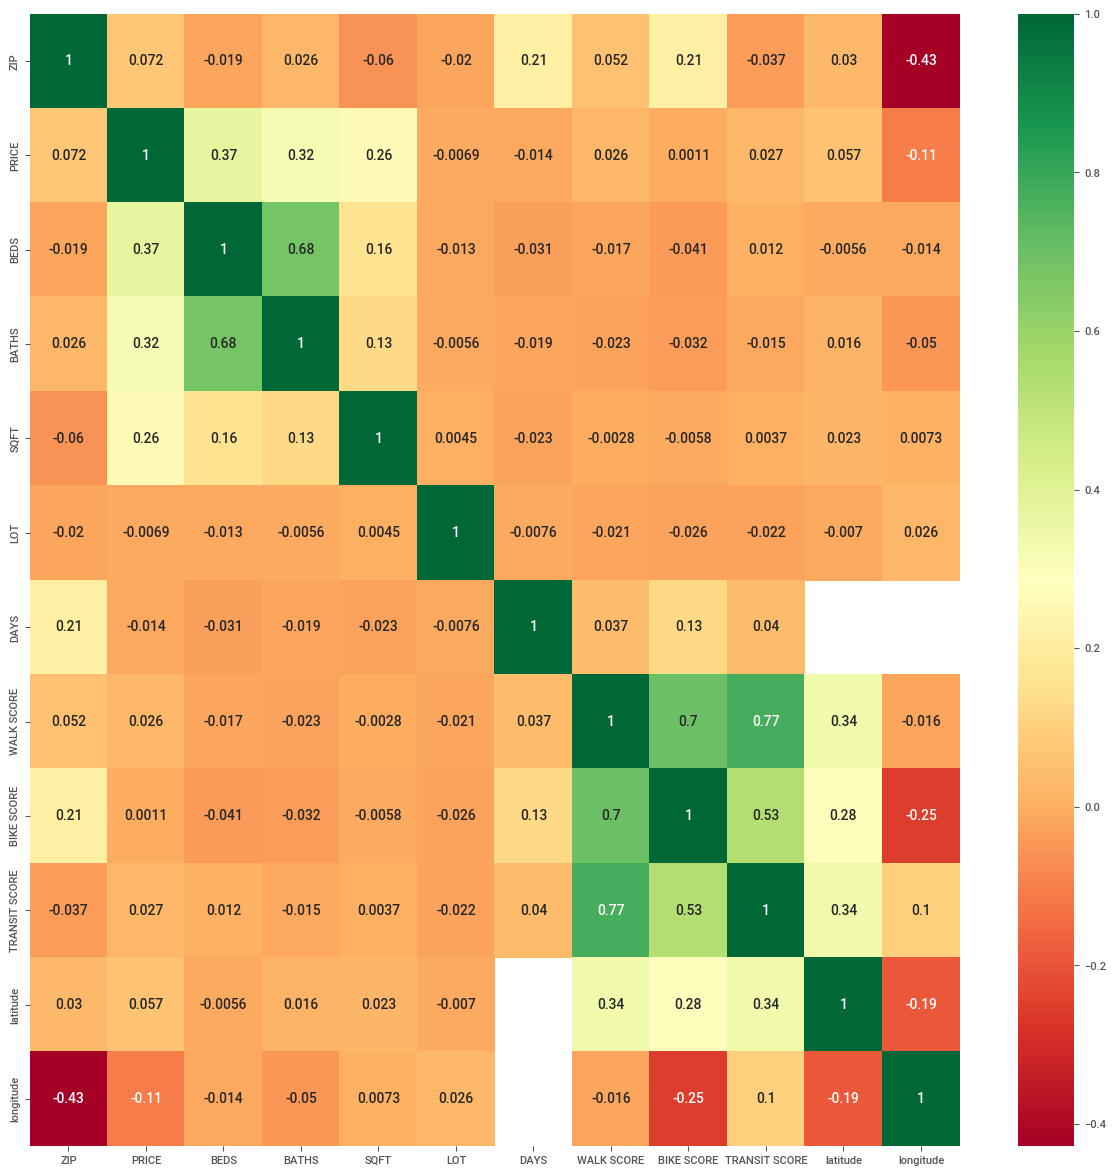

In [ ]:
X = midterm.iloc[:,0:11]  #independent columns
y = midterm.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = midterm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(midterm[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## PCA

In [ ]:
features = ['ZIP','PRICE', 'BEDS', 'BATHS', 'SQFT', 'LOT', 'DAYS', 'WALK SCORE', 'BIKE SCORE', 'TRANSIT SCORE']
df = midterm.loc[:, ~midterm.columns.isin(['ADDRESS','CITY', 'STATE', 'SOURCE', 'latitude', 'longitude'])]
df.head()

,TYPE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,WALK SCORE,BIKE SCORE,TRANSIT SCORE
10.0,1,97266,574900.0,4.0,2.5,2173.0,6098.0,8.0,22.0,34.0,37.0
11.0,1,97206,399900.0,2.0,1.0,1642.0,4791.0,8.0,74.0,86.0,48.0
12.0,1,97266,339900.0,4.0,1.0,2620.0,7840.0,9.0,86.0,91.0,57.0
14.0,2,97239,549900.0,3.0,2.5,1709.0,2613.0,9.0,82.0,70.0,44.0
16.0,2,97229,425000.0,2.0,2.5,1371.0,871.0,10.0,10.0,45.0,26.0


Plot Features before PCA

In [ ]:
fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="TYPE"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
# PCA
from sklearn.decomposition import PCA
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(3, df.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df[features])
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df[features])
cluster_df=Final_PCA.transform(df[features])
num_comps = comp_check.shape[0]
print(cluster_df)
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

[[-299895.09911024  -45863.54734166  -35952.16269904]
 [-474830.65339894  -50808.65447984  -36176.68893206]
 [-534879.00110928  -49007.69495705  -36303.81595216]
 ...
 [ 224711.4608752   -22843.33276965   46032.16521134]
 [ -80815.78376639  -42613.98776157  -35556.06296864]
 [  14032.04534246  -40989.57016582   51460.82622847]]
Using 3 components, we can explain 0.9999731389511077% of the variability in the original data.


Plot Features after PCA

In [ ]:
pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(10),
    color=df["TYPE"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

## FRACTAL CLUSTERING

In [ ]:
cluster = midterm.loc[:, ~midterm.columns.isin(['ADDRESS','CITY', 'STATE', 'SOURCE', 'latitude', 'longitude','DAYS','WALK SCORE','BIKE SCORE',
                                                'TRANSIT SCORE','LOT','TYPE'])]
cluster.head()                               

,ZIP,PRICE,BEDS,BATHS,SQFT
10.0,97266,574900.0,4.0,2.5,2173.0
11.0,97206,399900.0,2.0,1.0,1642.0
12.0,97266,339900.0,4.0,1.0,2620.0
14.0,97239,549900.0,3.0,2.5,1709.0
16.0,97229,425000.0,2.0,2.5,1371.0


In [ ]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

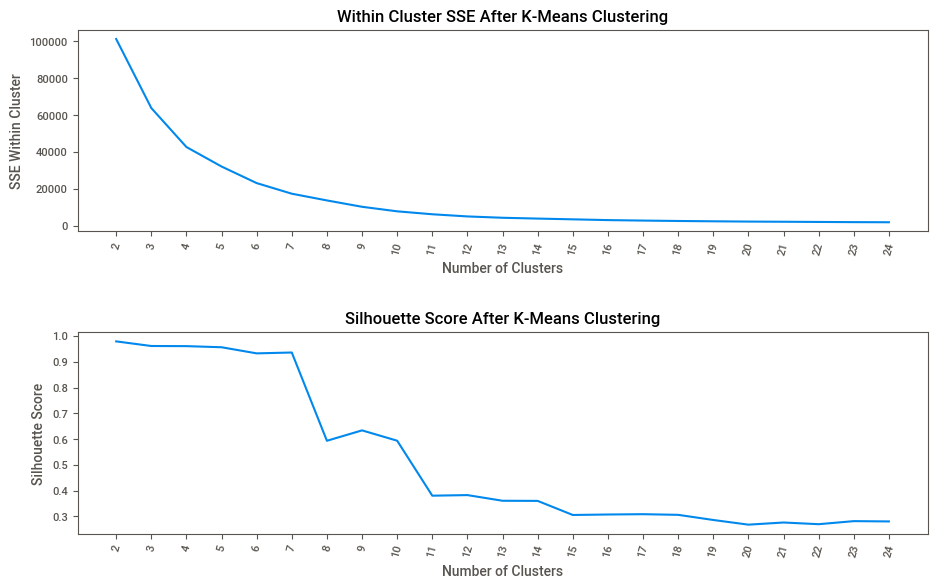

In [ ]:
plot_cluster(cluster, max_loop=25)

In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score,2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))
    
    return df

In [ ]:
first_trial = apply_cluster(cluster, clusters=7)

clustering performance
-----------------------------------
silhouette score: 0.94
sse withing cluster: 17314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "BEDS":"mean", "BATHS":"mean", "SQFT":"mean"})
    .sort_values('PRICE')
    .reset_index()
)

cluster_count = np.bincount(first_trial.cluster)
cluster_perf_df['ClusterCount'] = cluster_count
cluster_perf_df

,cluster,PRICE,BEDS,BATHS,SQFT,ClusterCount
0,6,2.850000e+05,4.000000,2.000000,217800.000000,2103
1,2,5.340000e+05,3.000000,2.000000,361548.000000,3
2,1,7.073333e+05,3.000000,2.666667,115869.666667,1
3,0,8.351625e+05,3.158345,2.388398,1968.742273,2
4,5,2.223280e+06,9.100000,6.600000,44470.500000,1
5,3,9.212500e+06,54.500000,110.500000,33300.000000,10
6,4,5.750000e+07,10.000000,14.000000,132420.000000,1


In [ ]:
df2_sub = cluster.query("cluster == 0").reset_index(drop=True)
df2_sub1 = df2_sub[['PRICE','BEDS', 'BATHS', 'ZIP', 'SQFT']]
df2_sub1.shape

(2103, 5)

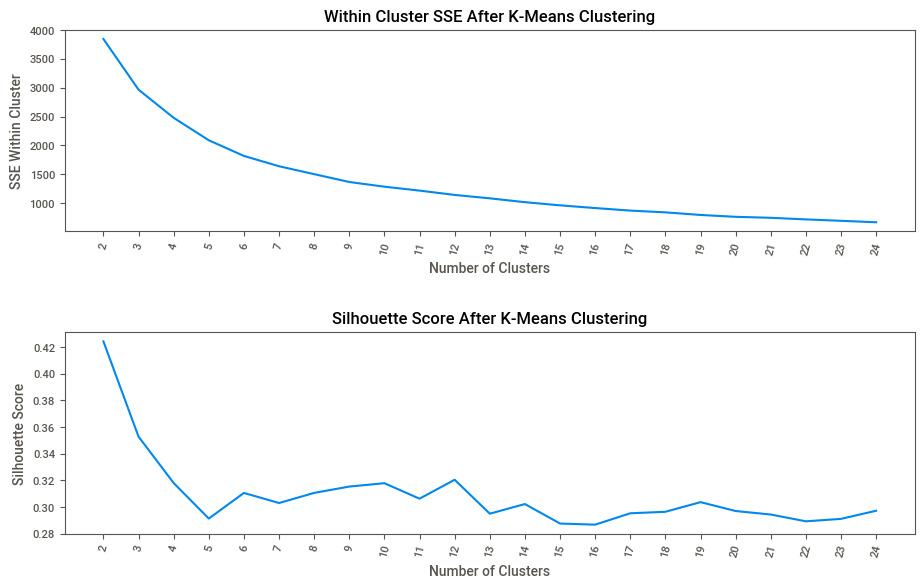

In [ ]:
plot_cluster(df2_sub1, max_loop=25)

In [ ]:
second_trial= apply_cluster(df2_sub1, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.35
sse withing cluster: 2968


In [ ]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"PRICE":"mean", "BEDS":"mean", "BATHS":"mean", "SQFT":"mean"})
    .sort_values('PRICE')
    .reset_index()
)
cluster_count = np.bincount(second_trial.cluster)
sub_cluster_perf_df['ClusterCount'] = cluster_count

sub_cluster_perf_df

,cluster,PRICE,BEDS,BATHS,SQFT,ClusterCount
0,1,5.818646e+05,2.521635,1.786298,1342.649038,744
1,0,1.033476e+06,3.896505,3.026882,2507.938172,1248
2,2,2.353813e+06,5.369369,4.878378,5393.990991,111


In [ ]:
best_sub_cluster = second_trial.query("cluster == 1")
best_sub_cluster.ZIP.unique()

array([97206, 97266, 97239, 97229, 97203, 97213, 97202, 97219, 97232,
       97211, 97267, 97222, 98106, 98125, 98136, 98109, 98116, 98112,
       98118, 98108, 98103, 98122, 98126, 98115, 98117, 98144, 98107,
       98178, 97123, 97124, 97006, 95139, 95119, 95128, 95124, 95123,
       95121, 95032, 95112, 92101, 92008, 76179, 80204, 92126, 50310,
       80247, 95136, 11221, 92114, 75229, 92154, 95125, 92010, 92109,
       95127, 50501, 92123, 92103, 95131, 80210, 95126, 10463, 92119,
       95122, 92027, 95116, 92120, 80202, 92115, 14206, 95118, 10451,
       80123, 95133, 10470, 98632, 92104, 80231, 92011, 95134, 92105,
       98168, 80223, 92026, 50312, 92025, 80218, 11223, 78758, 80220,
       80224, 92116, 52245, 10150, 95120, 80205, 75093, 95111, 95110,
       80216, 50313, 92110, 80219, 78210, 52003, 92102, 92106, 10317,
       80237, 17131, 10021, 98003, 76120, 80209, 52402, 11230, 95113,
       10183, 11218, 11004, 17627, 98226, 12546, 98203, 11235, 92117,
       95135, 79930,

In [ ]:
nomi = pgeocode.Nominatim('us')

lat = []
longi = []
for row in best_sub_cluster['ZIP']:
    addr = nomi.query_postal_code(row)
    if addr is None:
        lat.append(None)
        longi.append(None)
    else:
        latitude = addr.latitude
        longitude = addr.longitude  
    
    lat.append(latitude)
    longi.append(longitude)

best_sub_cluster['latitude'] = lat
best_sub_cluster['longitude'] = longi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = go.Figure(data=go.Scattergeo(
        lon = best_sub_cluster['longitude'],
        lat = best_sub_cluster['latitude'],
        text = best_sub_cluster['PRICE'],
        mode = 'markers',
        marker_color = best_sub_cluster['PRICE'],
        ))

fig.update_layout(
        title = 'Visualising ZIPCODE with more SQFT and less PRICE',
        geo_scope='usa',
    )
fig.show()

## MULLER LOOP : Regression

In [ ]:
# Find the zipcode where score are high and price is low?
# Muller Loop
# ZIP	PRICE	BEDS	BATHS	SQFT
midterm['ZIP'] = midterm['ZIP'].astype(str).astype(float)
midterm['TYPE'] = midterm['TYPE'].astype(str).astype(float)
midterm['BEDS'] = midterm['BEDS'].astype(str).astype(float)
midterm['BATHS'] = midterm['BATHS'].astype(str).astype(float)
midterm['SQFT'] = midterm['SQFT'].astype(str).astype(float)
midterm['LOT'] = midterm['LOT'].astype(str).astype(float)
midterm['PRICE'] = midterm['PRICE'].astype(str).astype(float).astype(int)
midterm['SCORE'] = ((midterm['TRANSIT SCORE'] + midterm['WALK SCORE'] + midterm['BIKE SCORE'])/3).astype(int)

bins = [0,500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000, 8500000, 9000000, 9500000, 10000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
midterm['PRANGE'] = pd.cut(midterm['PRICE'], bins=bins, labels=labels)
midterm['PRANGE'] = midterm['PRANGE'].fillna(2).astype(int)
midterm['PRANGE'] = midterm['PRANGE'].replace(np.inf, 1)
midterm['PRANGE'] = midterm['PRANGE'].replace(np.nan, 1)

f1 = pd.DataFrame(columns=['Classifier',' Classifier F1','Regressor','Regressor F1'])
regressions = midterm.loc[:, ~midterm.columns.isin(['ADDRESS','CITY', 'STATE', 'SOURCE', 'latitude', 'longitude','WALK SCORE','BIKE SCORE','TRANSIT SCORE'])]
regressions.head(50)

,TYPE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,DAYS,SCORE,PRANGE
10.0,1.0,97266.0,574900,4.0,2.5,2173.0,6098.0,8.0,31,2
11.0,1.0,97206.0,399900,2.0,1.0,1642.0,4791.0,8.0,69,1
12.0,1.0,97266.0,339900,4.0,1.0,2620.0,7840.0,9.0,78,1
14.0,2.0,97239.0,549900,3.0,2.5,1709.0,2613.0,9.0,65,2
16.0,2.0,97229.0,425000,2.0,2.5,1371.0,871.0,10.0,27,1
18.0,1.0,97236.0,520000,4.0,2.5,2298.0,3920.0,15.0,23,2
22.0,1.0,97203.0,449900,2.0,1.0,848.0,5662.0,16.0,67,1
23.0,1.0,97213.0,449900,2.0,1.0,848.0,5227.0,16.0,72,1
25.0,1.0,97217.0,699000,4.0,3.5,2774.0,3484.0,16.0,77,2
27.0,2.0,97239.0,485000,2.0,2.5,1550.0,1742.0,22.0,69,1


In [ ]:
names = ["Linear Regression", "MLPRegressor", "SVM","RandomForestRegressor", "KNeighborsRegressor", "GradientBoostingRegressor", "RANSAC"]

regressions_muller = [
                      LinearRegression(),
                      MLPRegressor(),
                      svm.SVC(),
                      RandomForestRegressor(),
                      KNeighborsRegressor(n_neighbors=3),
                      GradientBoostingRegressor(),
                      RANSACRegressor(random_state=0)
                      ]

feature_cols = ['TYPE','SQFT','BEDS','BATHS', 'LOT','SCORE','ZIP']
# feature_cols = ['LOT','BATHS','BEDS','PRANGE','SCORE','SQFT']
X = regressions[feature_cols]
y = regressions['PRICE']

n,mx=0,0
clas = ''
acc = [[0]*7]*7
f1 = [0]*7
c = 0
for name,clf in zip(names,regressions_muller):
  f1max = 0
  for j in range(1,8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(j*0.1))
    clf = clf.fit(X_train,y_train) 
    y_pred = clf.predict(X_test)
    c = np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    if f1max < c:
      f1max = c

    acc[n][j-1] = clf.score(X_test, y_test)
    if(acc[n][j-1] > mx):
      mx = acc[n][j-1]
      clas = name
  f1[n] = f1max
  n+=1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

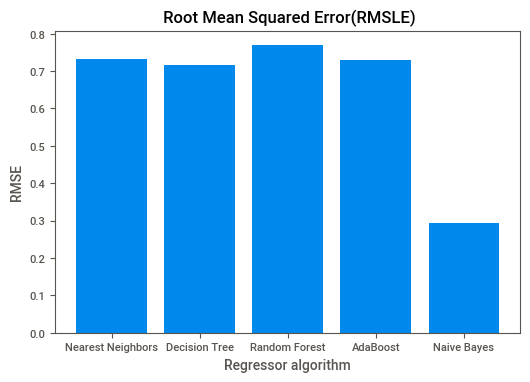

In [ ]:
plt.bar(names, f1)
plt.title(" Root Mean Squared Error(RMSLE)")

plt.xlabel("Regressor algorithm")
plt.ylabel("RMSE")

plt.show()

In [ ]:
print(len(names))
print(len(f1))
d = {'Regressor':names,'RMS score':f1}
compare1 = pd.DataFrame(d, columns=['Regressor','RMS score'])
compare1.head(10)

5
5


,Regressor,RMS score
0,Nearest Neighbors,0.732394
1,Decision Tree,0.715294
2,Random Forest,0.769231
3,AdaBoost,0.729984
4,Naive Bayes,0.293794


## MULLER LOOP: Classification

In [ ]:
classify = midterm.loc[:, ~midterm.columns.isin(['ADDRESS','CITY', 'STATE', 'SOURCE', 'latitude', 'longitude','DAYS','WALK SCORE','BIKE SCORE',
                                                'TRANSIT SCORE'])]
classify.head(50)

,TYPE,ZIP,PRICE,BEDS,BATHS,SQFT,LOT,SCORE,PRANGE
10.0,1.0,97266.0,574900,4.0,2.5,2173.0,6098.0,31,2
11.0,1.0,97206.0,399900,2.0,1.0,1642.0,4791.0,69,1
12.0,1.0,97266.0,339900,4.0,1.0,2620.0,7840.0,78,1
14.0,2.0,97239.0,549900,3.0,2.5,1709.0,2613.0,65,2
16.0,2.0,97229.0,425000,2.0,2.5,1371.0,871.0,27,1
18.0,1.0,97236.0,520000,4.0,2.5,2298.0,3920.0,23,2
22.0,1.0,97203.0,449900,2.0,1.0,848.0,5662.0,67,1
23.0,1.0,97213.0,449900,2.0,1.0,848.0,5227.0,72,1
25.0,1.0,97217.0,699000,4.0,3.5,2774.0,3484.0,77,2
27.0,2.0,97239.0,485000,2.0,2.5,1550.0,1742.0,69,1


In [ ]:
# MULLER CLASSIFICATION
names = ["Nearest Neighbors",
         "Decision Tree",
         "Random Forest",
         "AdaBoost",
         "Naive Bayes"
         ]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=10),
    AdaBoostClassifier(),
    GaussianNB()
    ]

feature_cols = ['LOT','BATHS','BEDS','PRANGE','SCORE','SQFT']
X = classify[feature_cols]
y = classify['TYPE']
n,mx=0,0
clas = ''
Classifier = ''
acc = [[0]*7]*7
f1 = [0]*5
for name,clf in zip(names,classifiers):
  f1max = 0
  for j in range(1,8):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(j*0.1))
    clf = clf.fit(X_train,y_train) 
    y_pred = clf.predict(X_test)
    print(f'Accuracy for test-size {j*0.1} for classifier {clf} is {clf.score(X_test, y_test)}')
    
    if f1max < metrics.f1_score(y_test, y_pred, average='micro'):
      f1max = metrics.f1_score(y_test, y_pred, average='micro')

    acc[n][j-1] = clf.score(X_test, y_test)
    if name == 'Decision Tree': 
      Classifier = clf
    if(acc[n][j-1] > mx):
      mx = acc[n][j-1]
      clas = name
  f1[n] = f1max
  n+=1
print(acc,mx,name)
print(f1)

Accuracy for test-size 0.1 for classifier KNeighborsClassifier(n_neighbors=3) is 0.7323943661971831
Accuracy for test-size 0.2 for classifier KNeighborsClassifier(n_neighbors=3) is 0.7011764705882353
Accuracy for test-size 0.30000000000000004 for classifier KNeighborsClassifier(n_neighbors=3) is 0.6923076923076923
Accuracy for test-size 0.4 for classifier KNeighborsClassifier(n_neighbors=3) is 0.7090694935217904
Accuracy for test-size 0.5 for classifier KNeighborsClassifier(n_neighbors=3) is 0.6701225259189444
Accuracy for test-size 0.6000000000000001 for classifier KNeighborsClassifier(n_neighbors=3) is 0.6881382560879812
Accuracy for test-size 0.7000000000000001 for classifier KNeighborsClassifier(n_neighbors=3) is 0.6936026936026936
Accuracy for test-size 0.1 for classifier DecisionTreeClassifier() is 0.6619718309859155
Accuracy for test-size 0.2 for classifier DecisionTreeClassifier() is 0.7152941176470589
Accuracy for test-size 0.30000000000000004 for classifier DecisionTreeClassi

In [ ]:
d = {'Classifier':names,'F1 score':f1}
compare = pd.DataFrame(d, columns=['Classifier','F1 score'])
compare.head()

,Classifier,F1 score
0,Nearest Neighbors,0.732394
1,Decision Tree,0.715294
2,Random Forest,0.769231
3,AdaBoost,0.729984
4,Naive Bayes,0.293794


### *Comparison between Classifier and Regressor*

In [ ]:
# IF input parameters for classifiers and regressors are same
# Our best model: Random Forest Classifier
comparison = pd.concat([compare, compare1], axis=1)
comparison.head(10)

,Classifier,F1 score,Regressor,RMS score
0,Nearest Neighbors,0.732394,Nearest Neighbors,0.732394
1,Decision Tree,0.715294,Decision Tree,0.715294
2,Random Forest,0.769231,Random Forest,0.769231
3,AdaBoost,0.729984,AdaBoost,0.729984
4,Naive Bayes,0.293794,Naive Bayes,0.293794


## GINI SCORE

In [ ]:
feature_imp = pd.Series(Classifier.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

LOT       0.303259
BEDS      0.217950
SCORE     0.166200
SQFT      0.163556
BATHS     0.087272
PRANGE    0.061764
dtype: float64

No handles with labels found to put in legend.


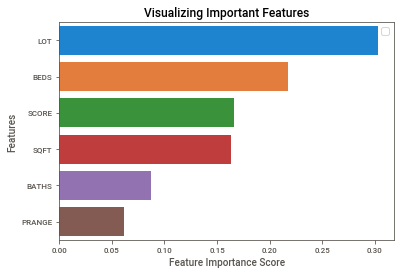

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Putting the feature names and class names into variables
cn = ['1.', '2.', '3.', '4.', '5.', '6.', '7.']

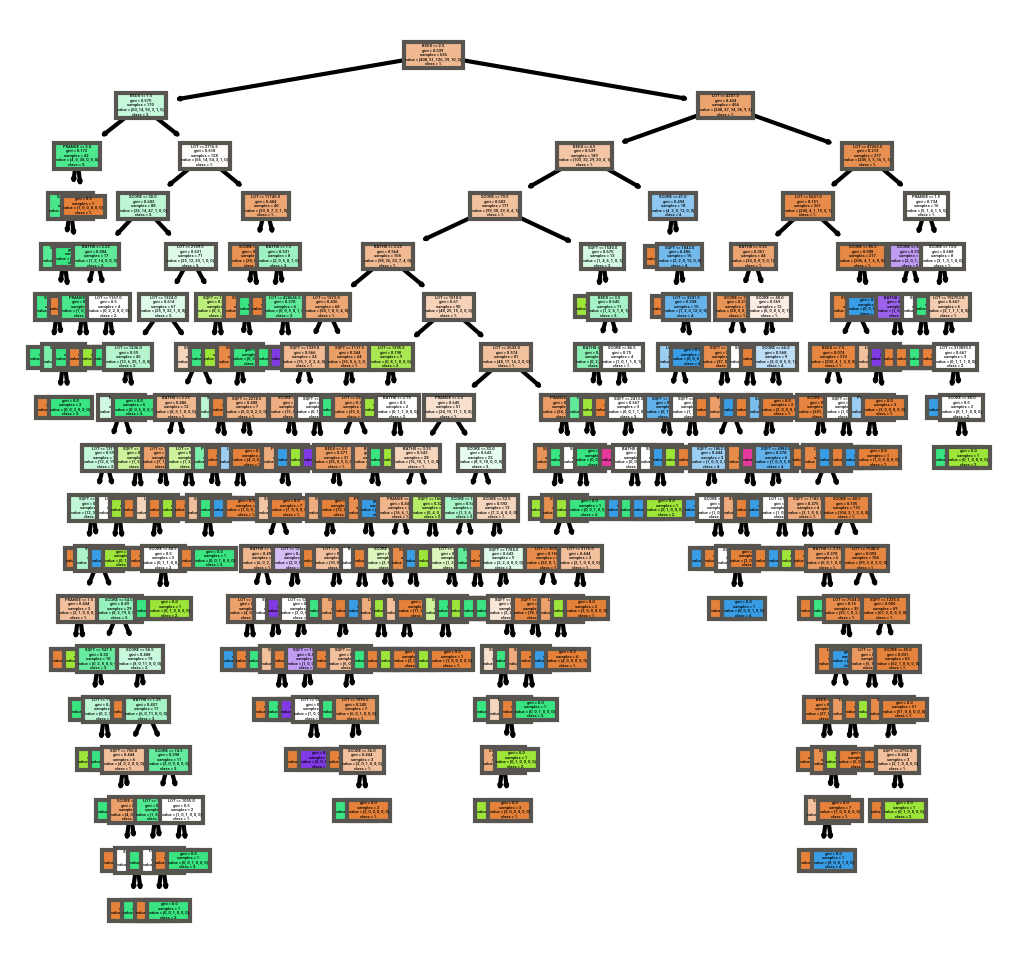

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(Classifier,
               feature_names = feature_cols, 
               class_names=cn,
               filled = True);


In [ ]:
tree.export_graphviz(Classifier,
                     out_file="tree.dot",
                     feature_names = feature_cols, 
                     class_names=cn,
                     filled = True)

## DASHBOARD - CLASSIFIER

In [ ]:
feature_cols = ['LOT','BATHS','BEDS','PRANGE','SCORE','SQFT']
X = classify[feature_cols]
y = classify['TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
model = RandomForestClassifier().fit(X_train,y_train)
explainer = ClassifierExplainer(model, X_test, y_test)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
InlineExplainer(explainer).shap.dependence()
InlineExplainer(explainer).shap.dependence(hide_cats=True, hide_index=True)
InlineExplainer(explainer).shap.overview()

Calculating shap values...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
class CustomDashboard(ExplainerComponent):
    def __init__(self, explainer, name=None):
        super().__init__(explainer, name=name)
        self.dependence = ShapDependenceComponent(explainer, name=self.name+"dep",
                hide_selector=True, hide_cats=True, hide_index=True)

    def layout(self):
        return html.Div([self.dependence.layout()])

ExplainerDashboard(explainer, CustomDashboard).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

## DASHBOARD - REGRESSOR

In [ ]:
report=sv.analyze(regressions)
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



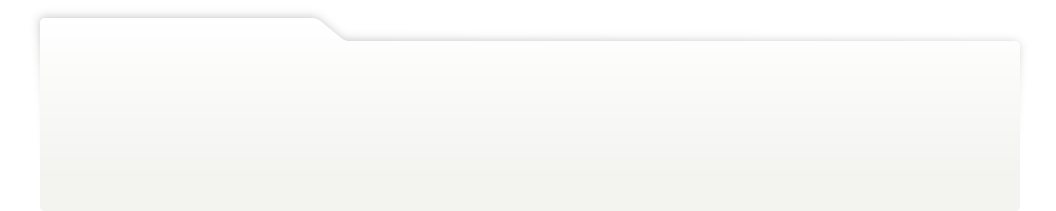
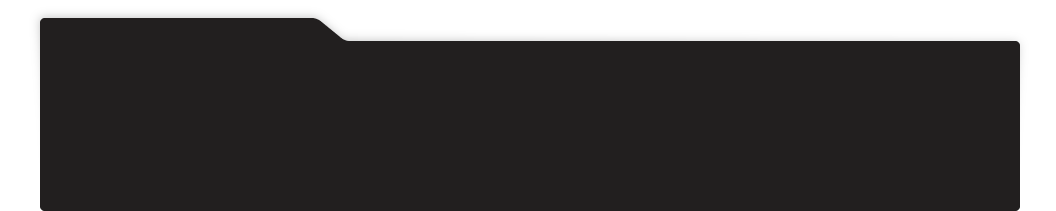
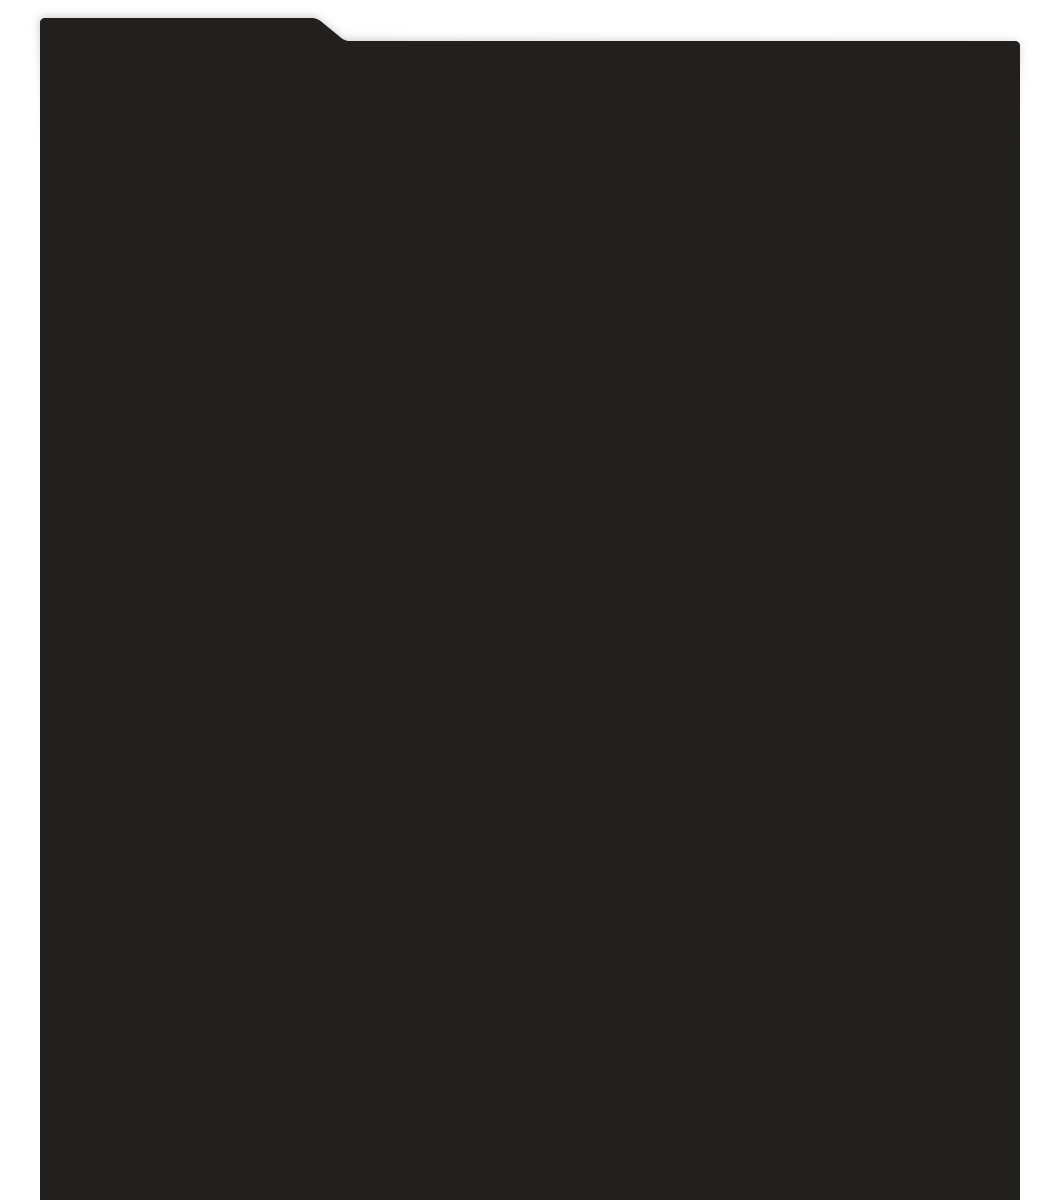
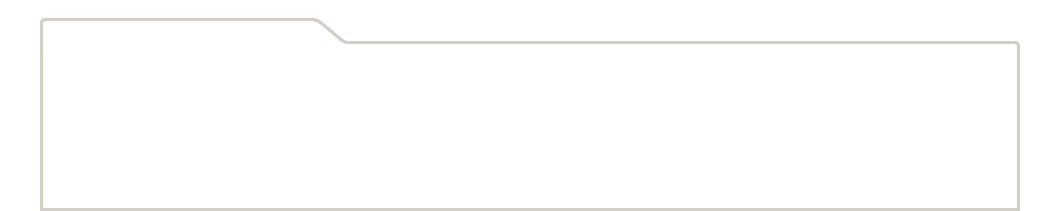
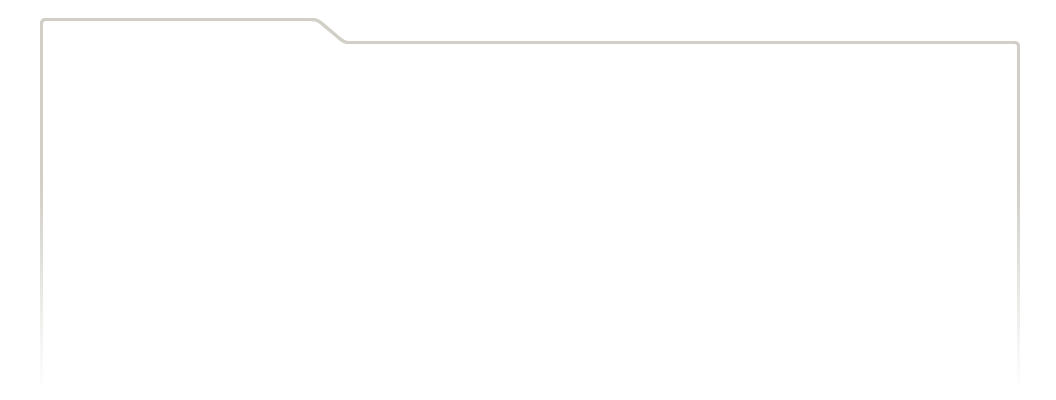
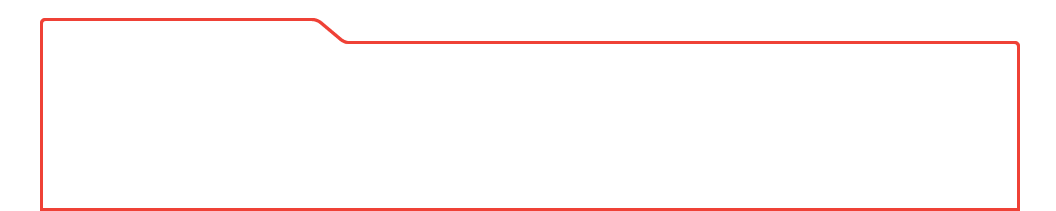
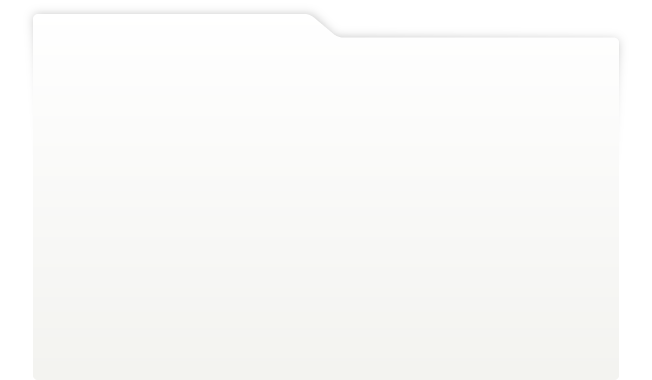
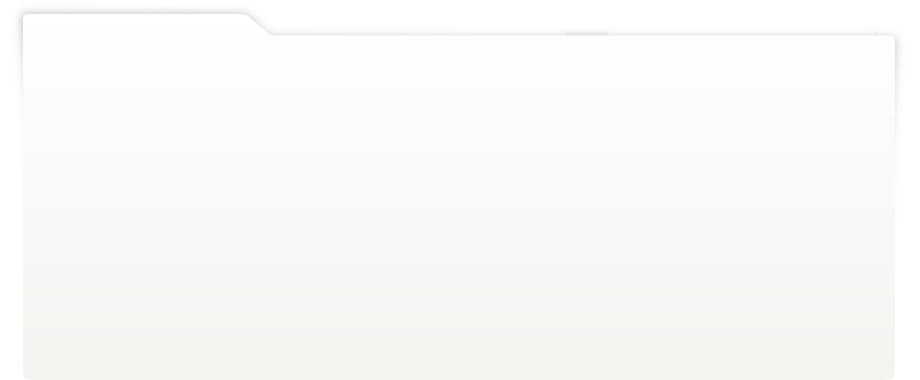
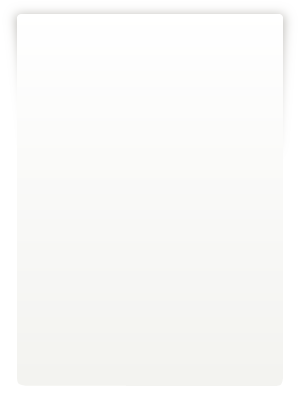
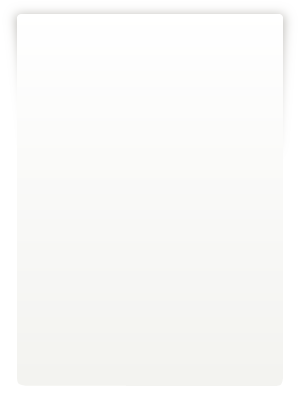
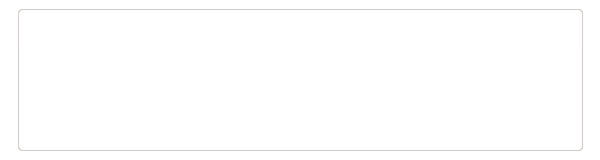
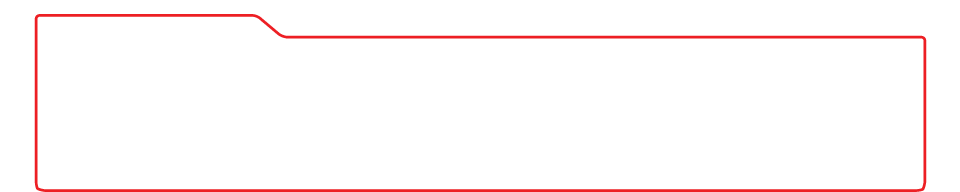
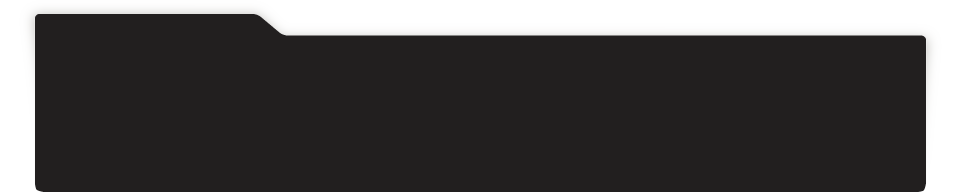
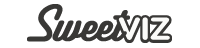
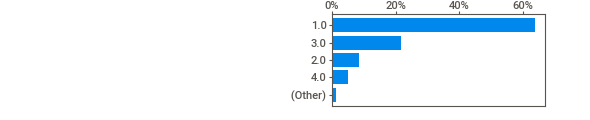
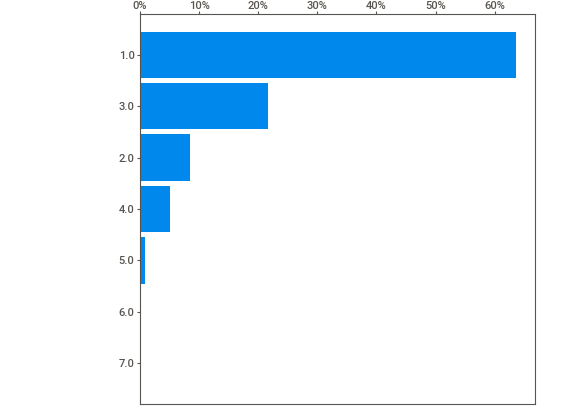
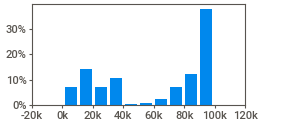
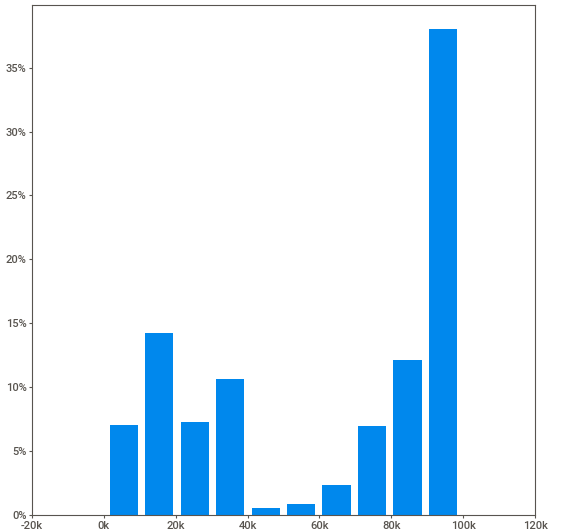
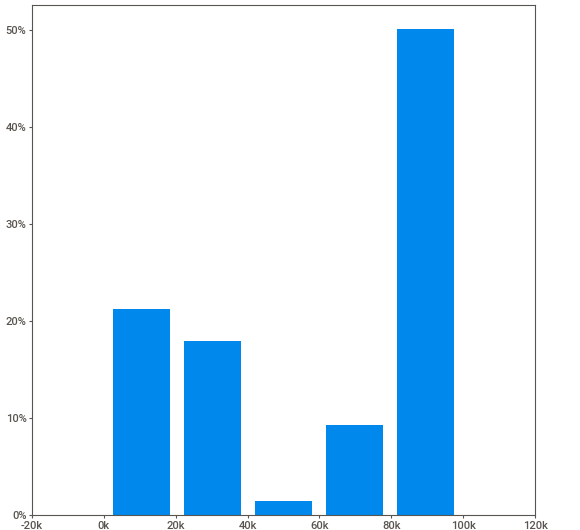
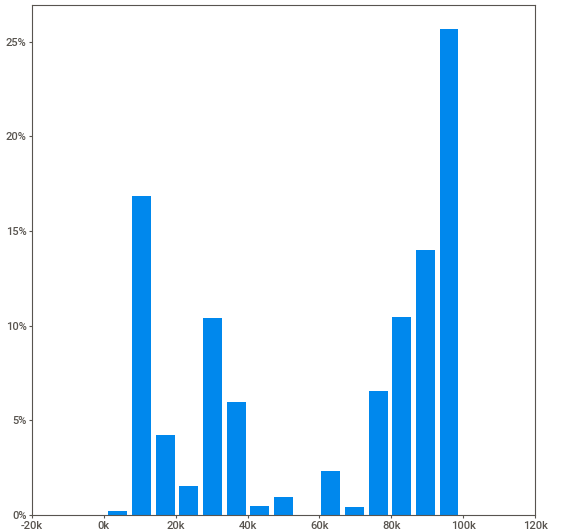
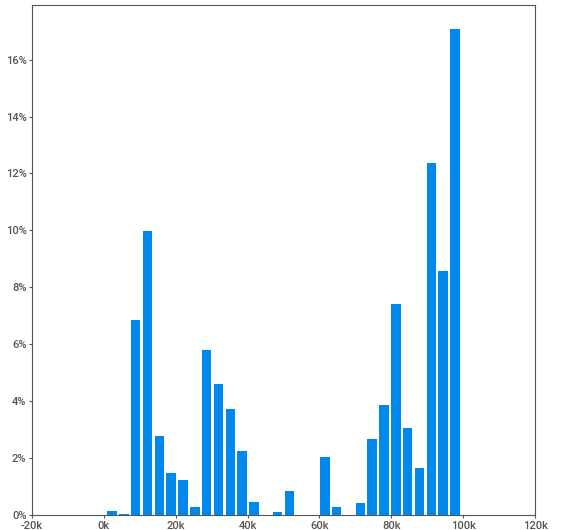
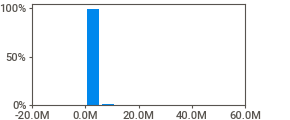
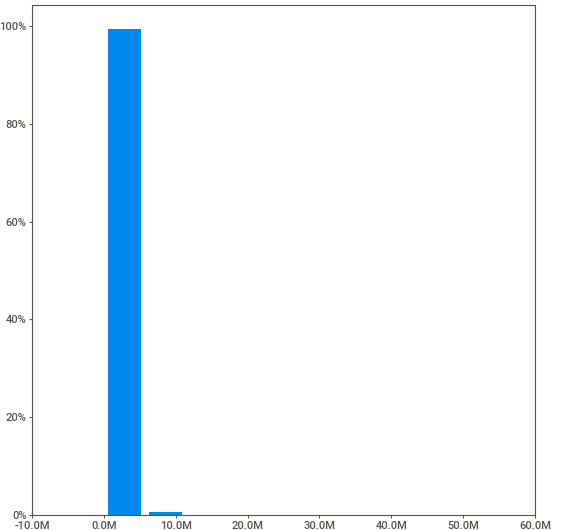
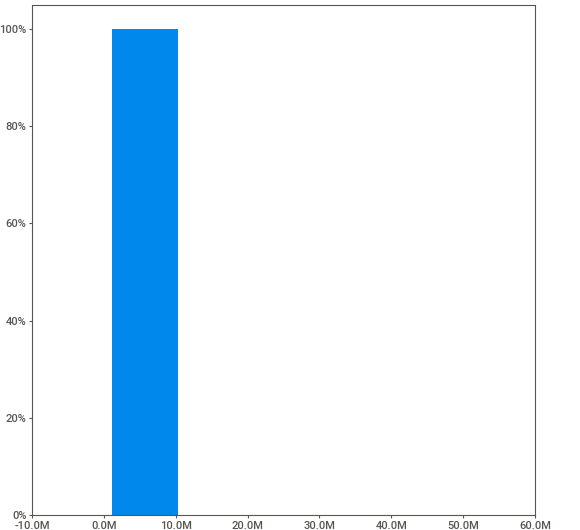
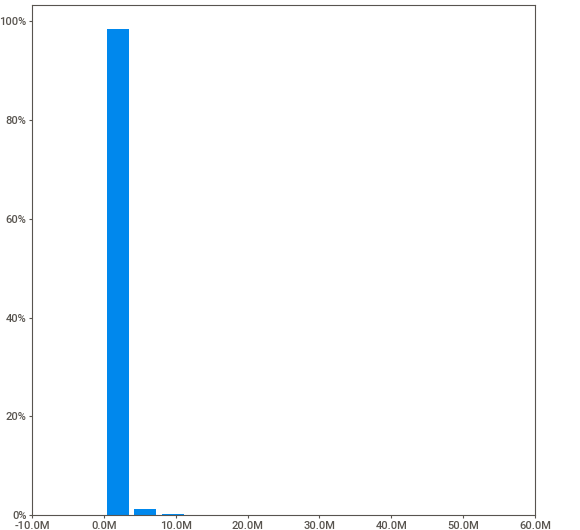
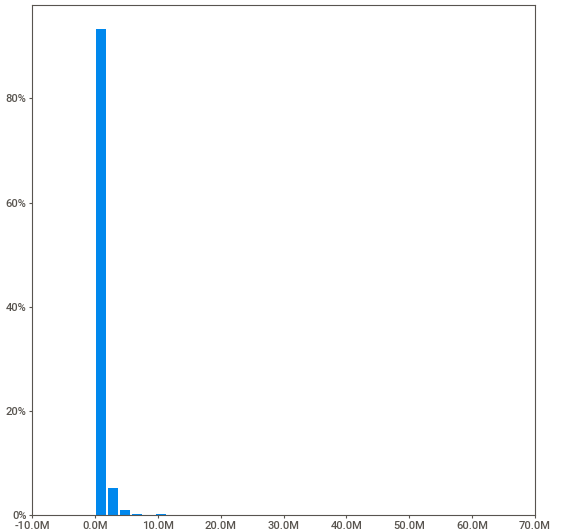
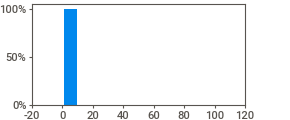
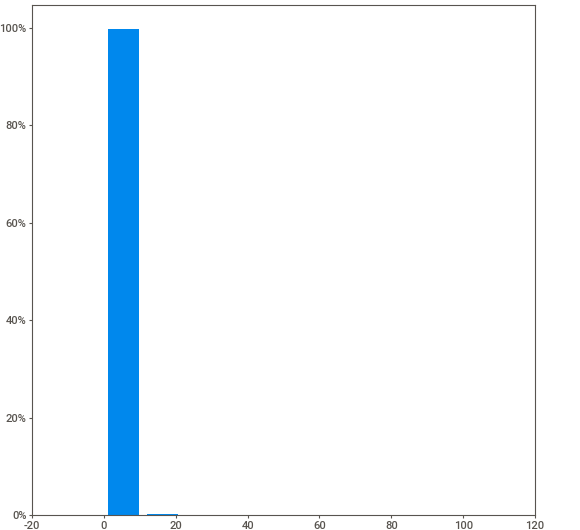
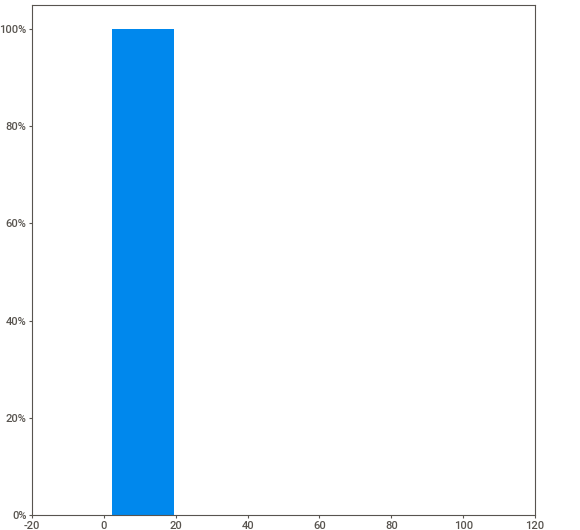
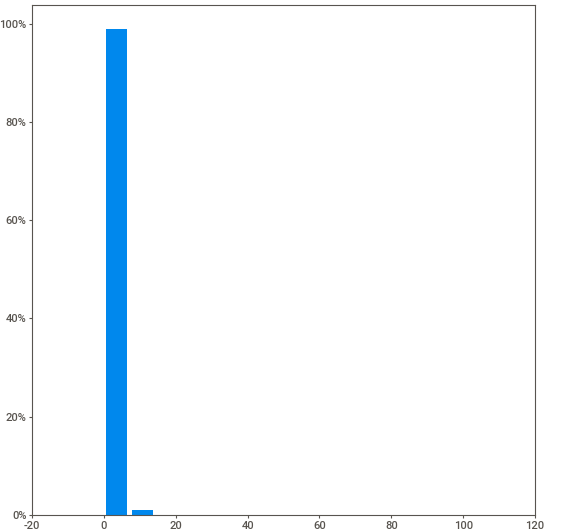
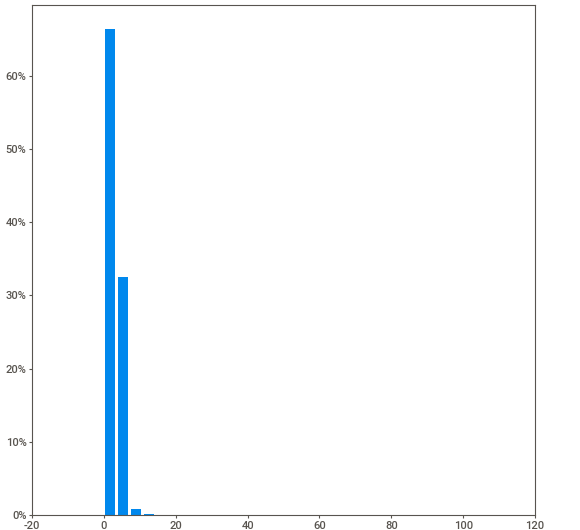
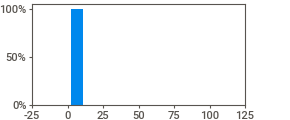
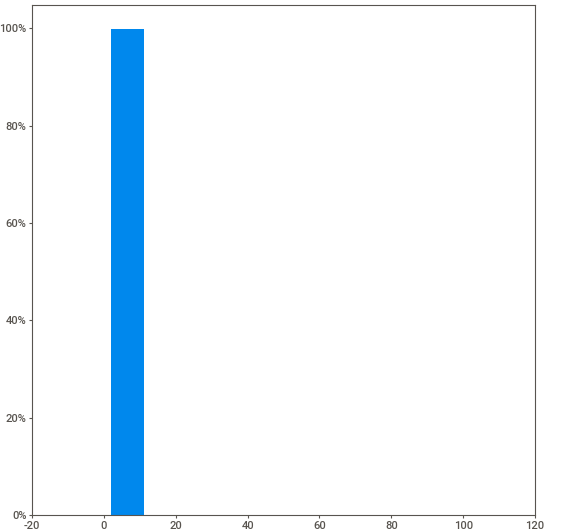
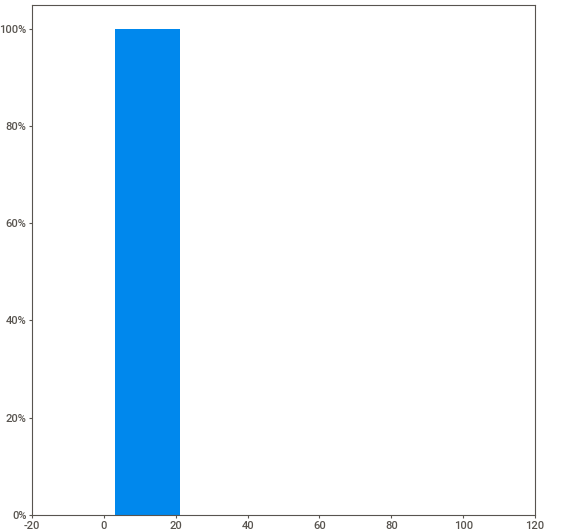
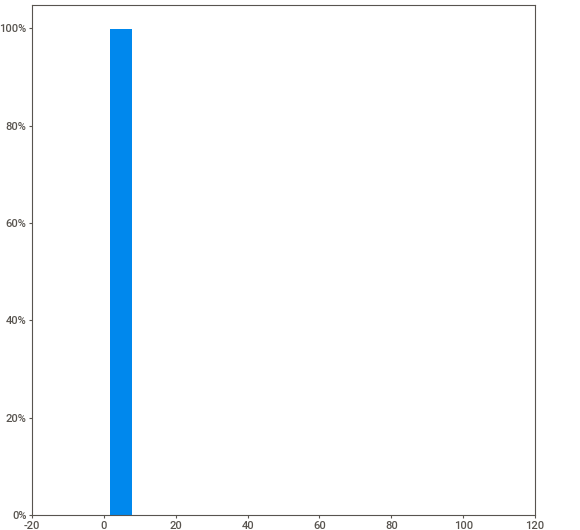
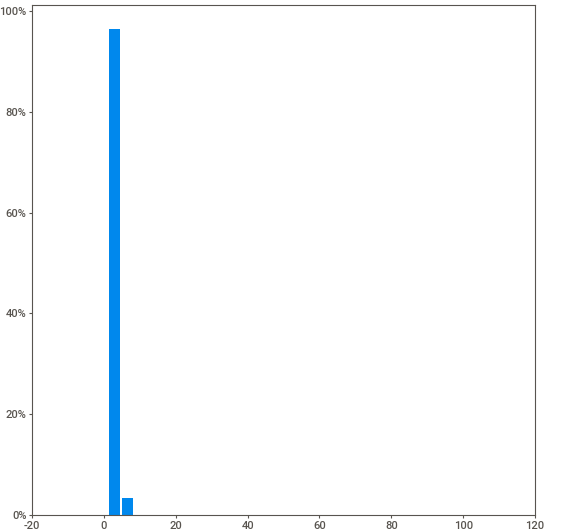
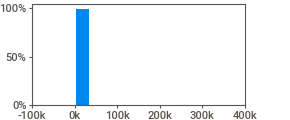
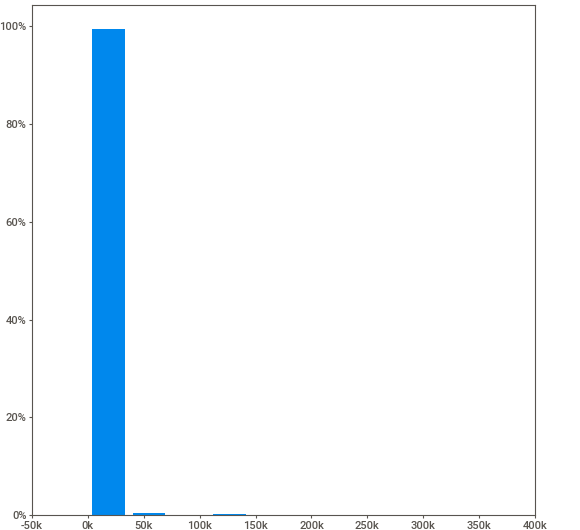
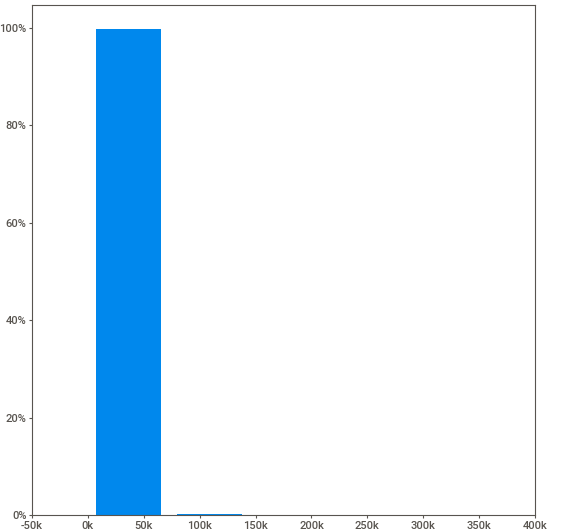
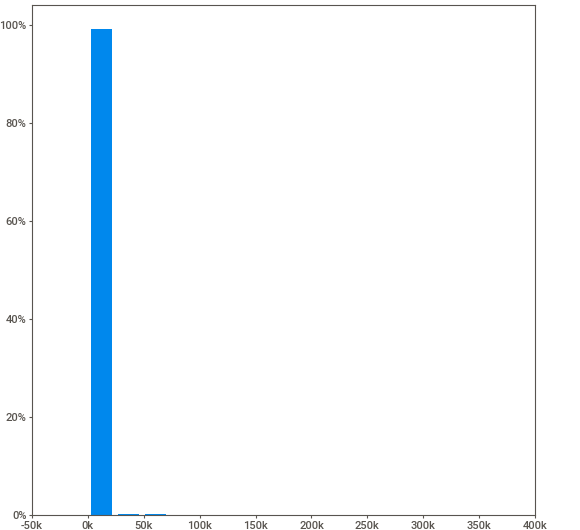
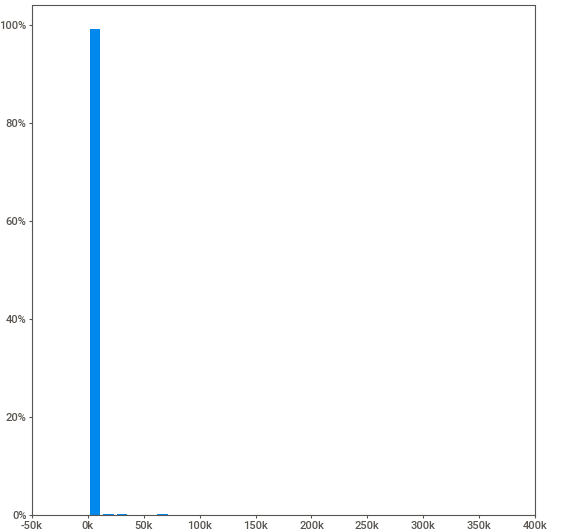
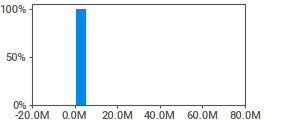
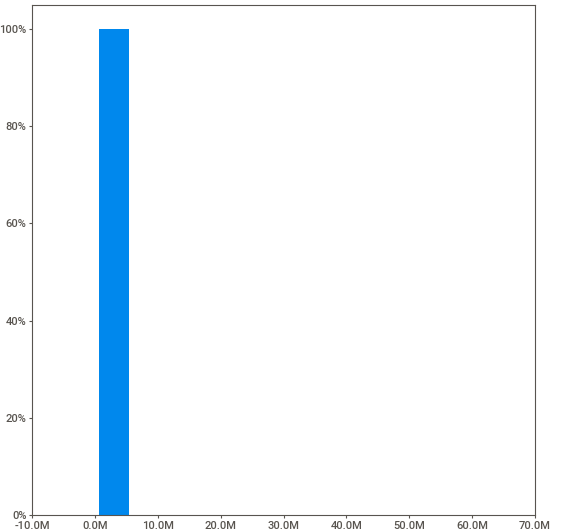
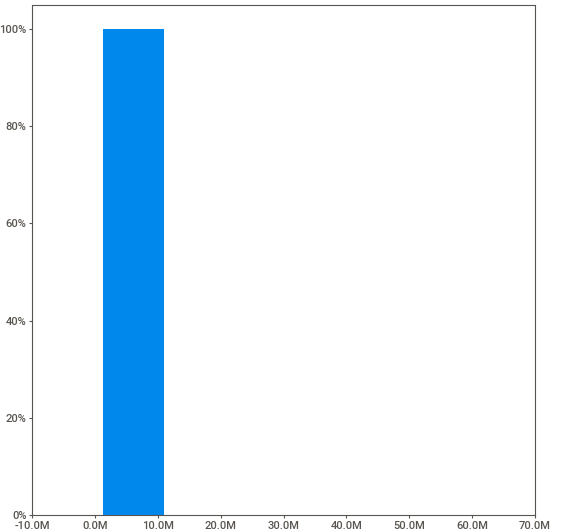
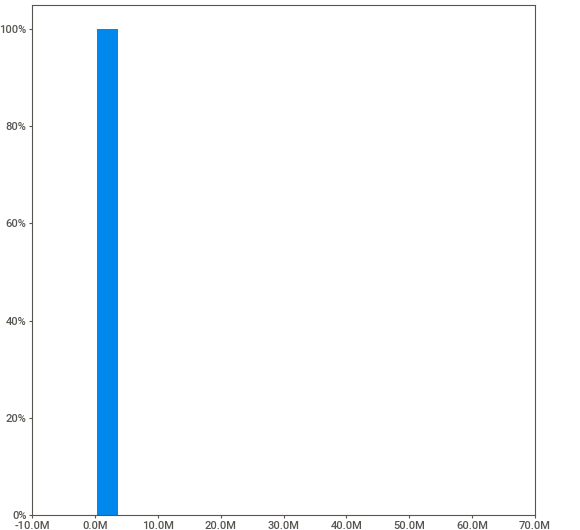
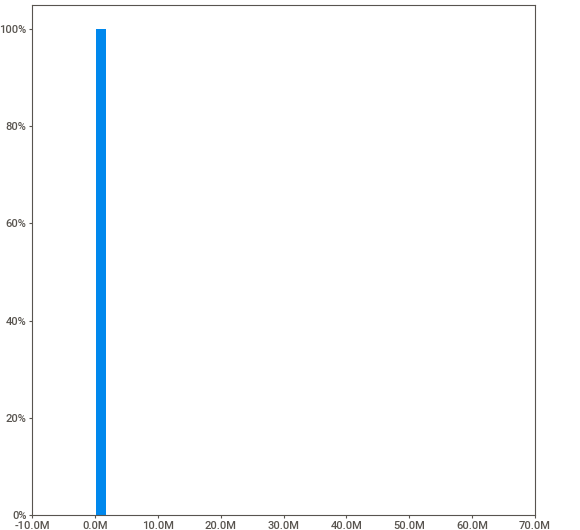
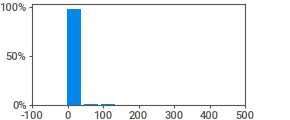
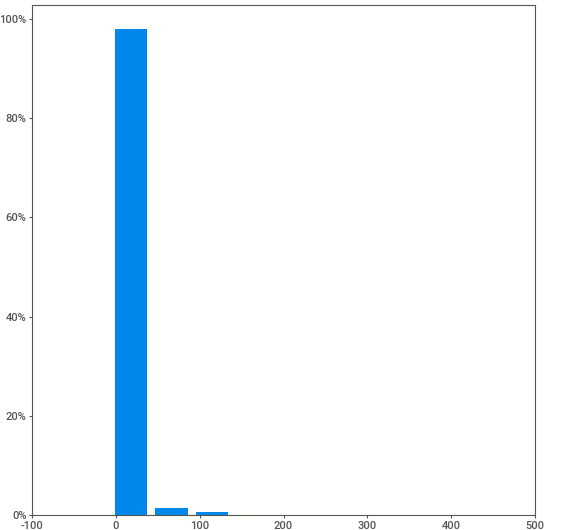
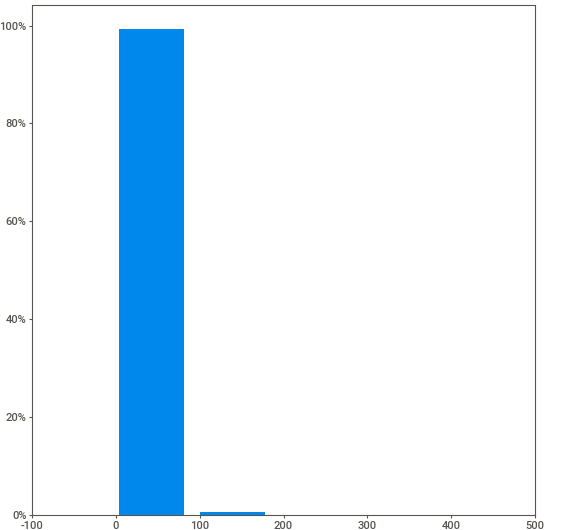
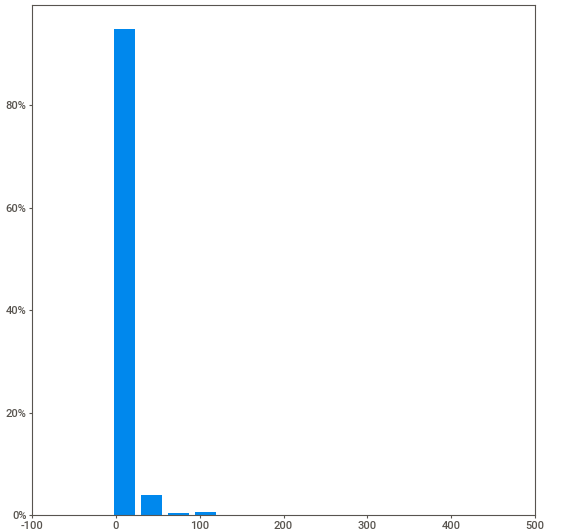
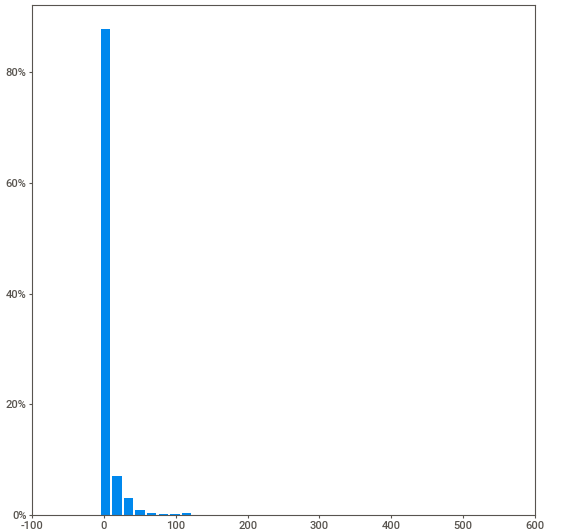
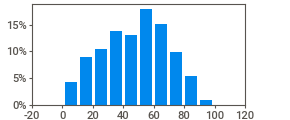
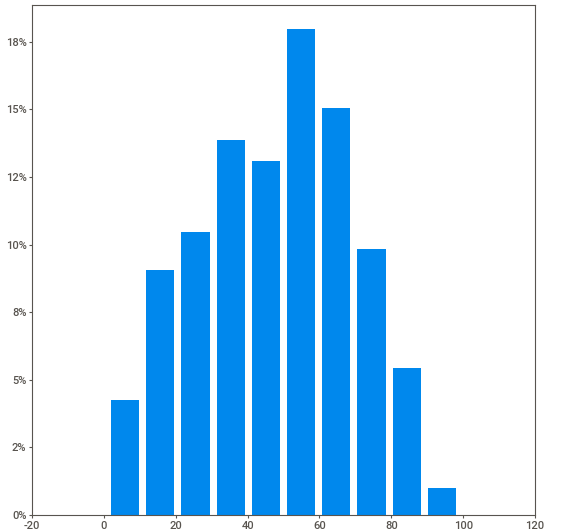
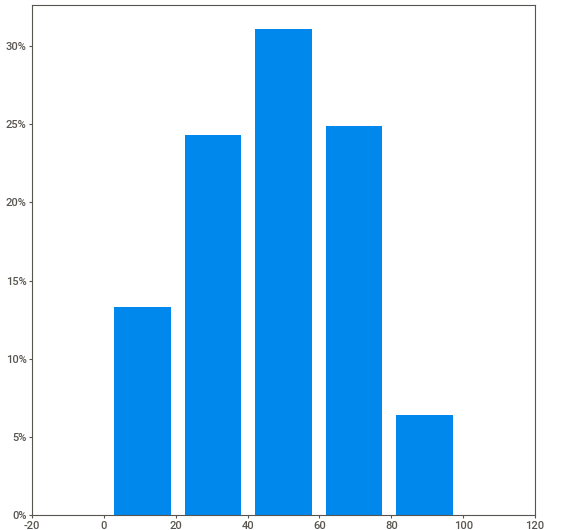
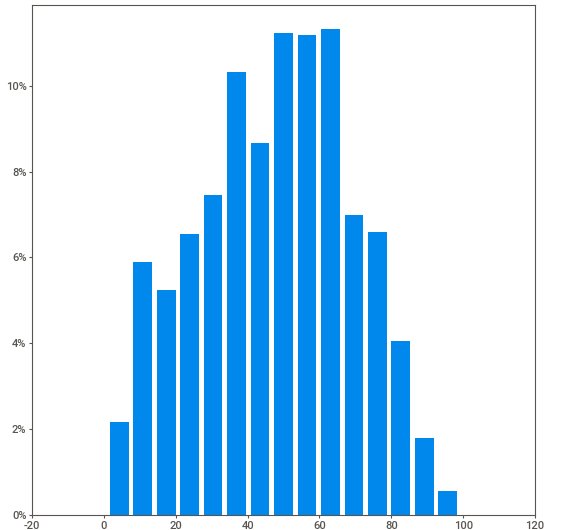
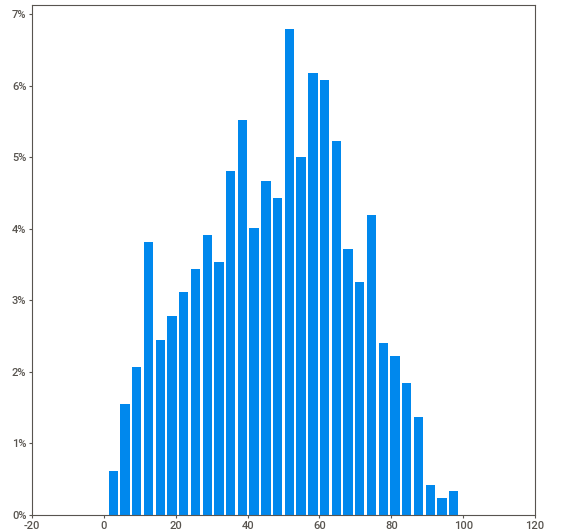
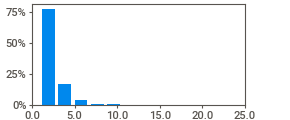
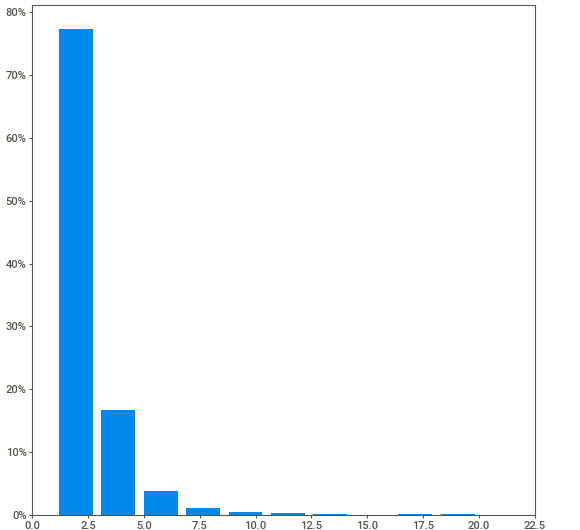
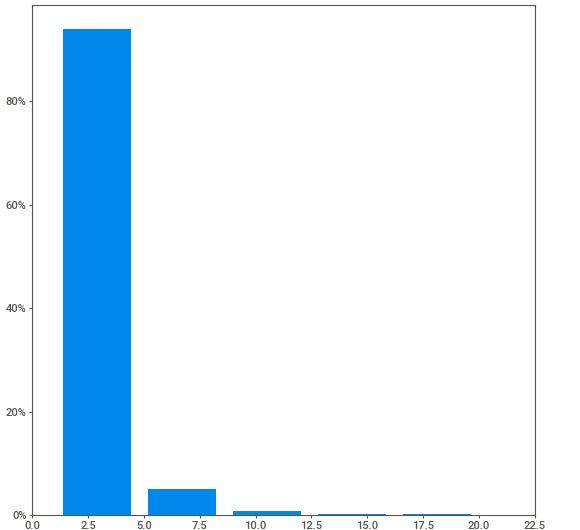
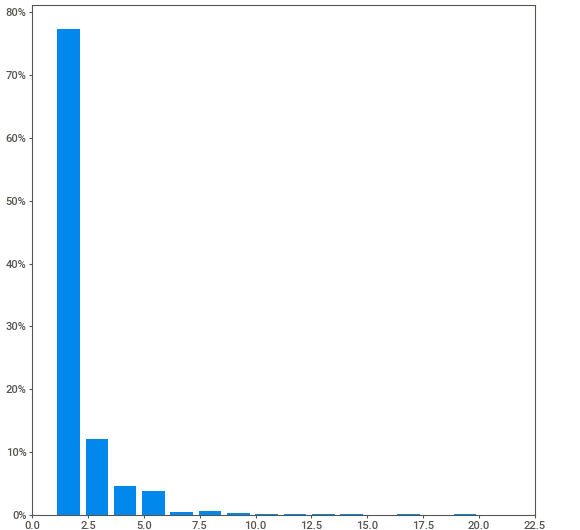
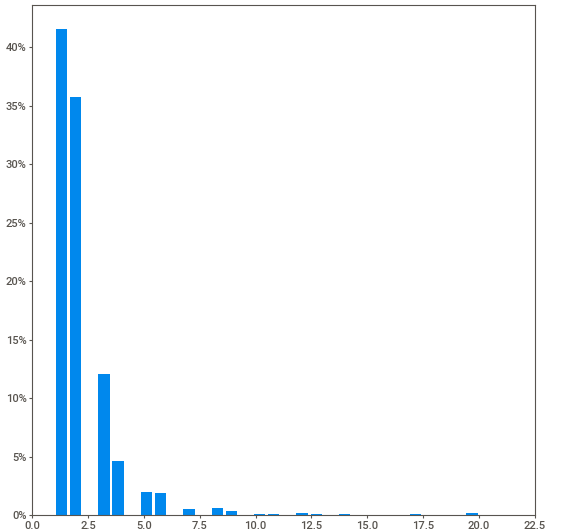
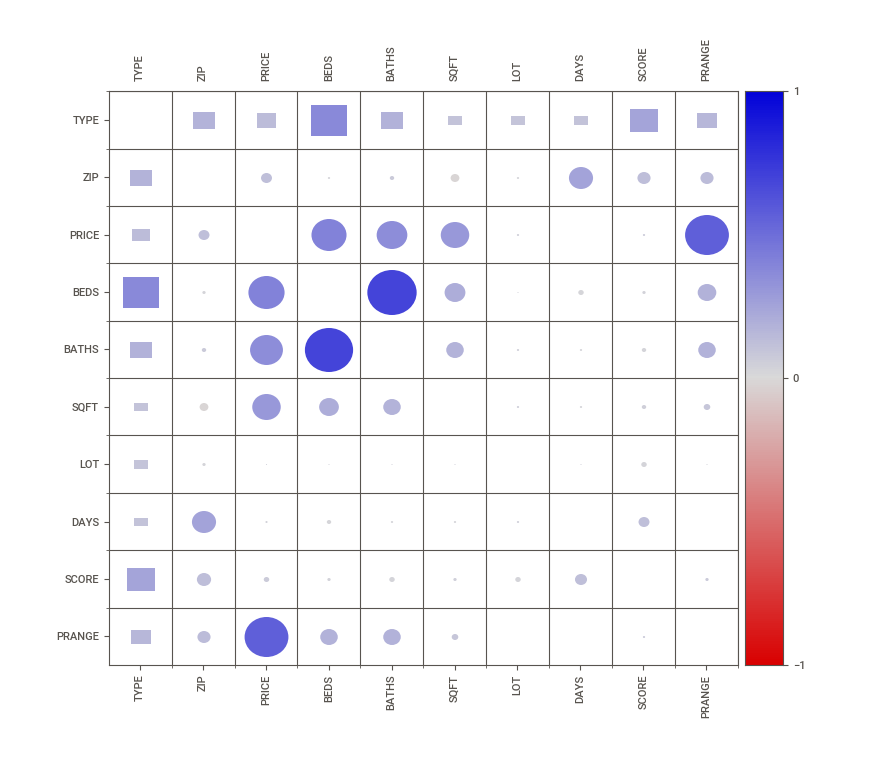
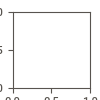

In [ ]:
IPython.display.HTML('eda_report.html')

In [ ]:
feature_cols = ['TYPE','SQFT','BEDS','BATHS', 'LOT','SCORE','ZIP']
X = regressions[feature_cols]
y = regressions['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model1 = LinearRegression().fit(X_train,y_train)
explainer = RegressionExplainer(model1, X_test, y_test)
ExplainerDashboard(explainer).run()

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.2:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

## DOCUMENTATION

**1. Data Scraping**

* Realtor : ~18000 records
* Redfin  : ~ 4000 records
* Walk score, transit score and bike score for all zipcodes

**2. Latent Variables & Latent Manifold**

With our dataset we have address, from this we extracted ZIP as ZIP plays a crucial role in determining the home prices. 

Walk Score, Transit Score and Bike Score gives us the information about the locatlioty which plays an important role while buying homes. We extracted this information from Walk Score API. 

Walk Score API takes latitude, longitude and address as inputs and provides 

us the details of Walk Score, Transit Score and Bike Score. 

Realtor data didnt have latitude and longitude attributes. We extracted these information based on the ZIP and address from pgeocode and saved it in csv file

Since calculating walk score and latitude and longitude are bound by rate limiting issues and consume lot of time, we have calculated this before data cleaning and used that files for processing. Attaching the sample code used to calculate walk score api

Code:


```
from walkscore import WalkScoreAPI
api_key = '99ab4cb3d0a18ebe677faa86750933fe'

walkscore_api = WalkScoreAPI(api_key = api_key)

walk_score = []
bike_score = []
transit_score = []
for row in redfin.iterrows():
    print(row)
    result = walkscore_api.get_score(latitude = row[1]['LATITUDE'] , longitude = row[1]['LONGITUDE'], address = row[1]['ADDRESS'])
    if result is None:
        walk_score.append(None)
        bike_score.append(None)
        transit_score.append(None)
    else:
        wscore = result.walk_score
        bscore = result.bike_score
        tscore = result.transit_score  
    
    walk_score.append(wscore)
    bike_score.append(bscore)
    transit_score.append(tscore)

redfin['walk_score'] = walk_score
redfin['bike_score'] = bike_score
redfin['transit_score'] = transit_score
redfin.head()
```

**3. Pickeled files**

Our model is stored at: [HERE](https://drive.google.com/drive/u/0/folders/1fNS9p6YnkyyN9e_p5eNdyXWUyQdvEkuV)

Code: 

```
pickle.dump(clf, open('gdrive/My Drive/Conquerors/Midterm/models/'+name+'.pkl', 'wb'))
```

**4. Visualization Techniques**

  * [ExplainerDasboard](https://explainerdashboard.readthedocs.io/en/latest/#)
  * [Sweetviz](https://pypi.org/project/sweetviz/)

**5. Feature Importance**

  * Gini score
  * SHAP score 


Accuracy score of our model has been very high >75%.

**Our Goal:** 
1. Predict the price given lot size, sqft area, number of beds,baths
2. We are also able to predcit the type of the house (Single family, Townhouse, Condo) can be obtained given lot size, sqft area, number of beds,baths and price range